# Who feeds the world ? And how wealthy are they ?
There are **folium maps** in this notebook. If they do not display or do not display well, we suggest you to **have a look at the `.html` file** that is located the same repository.

## Abstract <a name="abstract"></a>

Are countries that plant more maize richer than countries planting rice? Is it true that developed countries produce more meat? Are you better off being a food net exporter or importer? Are food prices more stable if you produce more food locally or trade more?

In this project we analyze **the effects that a country agricultural sector has on its different economic indicators**. The indicators of the agricultural sector we used are crops and livestock **production, exports and imports** of **crops, livestock and live animals**. For these, we use the data from the "**Global Food & Agriculture Statistics**" datasets. We quantify the **economic success** by **Gross Domestic Product (GDP)**, but also by **price stability**, as defined by low changes in **Consumer Price Indices (CPI)**. We further use the **Food and Agriculture Organization (FAO)** definition of **food self-sufficiency** to analyze its link to economic success and stability. 
After finding the results of the agricultural products most highly linked with economic success, we create **visualizations** in the form of **maps**. Through these timeline maps, we show how the production/export/import of important products has developed globally. We also use maps to visualize the **level of food self-sufficiency and price stability**.




## Research questions <a name="abstract2"></a>

We would like to work on the following research questions:

- Which **agricultural products** are the **most produced/exported/imported** globally?
- Which of them are **correlated more highly with GDP**?
- Can we **predict** which countries will have **further GDP growth** based on the repartition of their agricultural sector?
- How can we define **price stability**? How can we define **food self-sufficiency**? Is there a link?
- What is countries **agricultural trade balance**? Are countries that are net exporters or importers richer ? Are self-sufficient countries **richer** ?
- How does the geographical repartition of important agricultural products look like? Which countries are **net food exporters or importers**? How did this **evolve over the last few decades** ?


# Table of contents <a name="toc"></a>


[Abstract](#abstract)

[Research questions](#abstract2) 

[Table of contents](#toc)

1. [Data cleansing and preprocessing](#1)

    1. [Dataset description](#1A)   
    
    2. [Loading the data set](#1B)
    
    3. [Understanding the data set](#1C)
    
    4. [Cleansing the data set](#1D)
        
    5. [Preprocessing the data set](#1E)
        
    6. [Making one uniformized dataframe](#1F)
        
2. [Data exploration and first observations](#2)
        
    1. [Food productions, importations and exportations](#2A)
            
    2. [Consumer price indices](#2B)  
                
    3. [Structure of international trade and historical context](#2C)      
        
    4. [Economic classification of countries](#2D)    
        
3. [Descriptive data analysis](#3)

    1. [Production and consumption of food from a time-space geography point of view](#3A)

    2. [Food self-sufficiency](#3B)

    3. [Analysis of food production and trade with GDP](#3C)

    4. [Food prices stability and agricultural features](#3D)      

4. [Informed plan for next actions](#4)

**External imports:**

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import folium
import seaborn as sns
import json
import re
import requests
from bs4 import BeautifulSoup
from ipywidgets import interact
from IPython.display import display
import scipy.cluster.hierarchy as spc
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import Ridge
from operator import itemgetter
from sklearn import preprocessing
from tqdm import tqdm

**Setup:**

In [2]:
data_folder_path = "Scripts/Data/current_FAO/raw_files/"

files = {"Crops production" : "Production_Crops_E_All_Data_(Normalized).csv",
         "Food trade" : "Trade_Crops_Livestock_E_All_Data_(Normalized).csv", 
         "Consumer price indices" : "ConsumerPriceIndices_E_All_Data_(Normalized).csv",
         "Macroeconomy" : "Macro-Statistics_Key_Indicators_E_All_Data_(Normalized).csv",
         "Livestock production" : "Production_Livestock_E_All_Data_(Normalized).csv",
         "Live animals trade" : "Trade_LiveAnimals_E_All_Data_(Normalized).csv"
        }
interesting_datasets = files.keys()

## 1. Data cleansing and preprocessing <a name="1"></a>

In this part, we will load, explore and clean the dataset in order to remove typing errors, missing information, inaccuracies, and so on.

1. 

    1. [Dataset description](#1A)   
    
    2. [Loading the data set](#1B)
    
    3. [Understanding the data set](#1C)
    
    4. [Cleansing the data set](#1D)
    
        1. [Removing unuseful data](#1Da)         
        
        2. [Handling of the missing data](#1Db)       
        
    5. [Preprocessing the data set](#1E)
    
        1. [Converting country names between different naming conventions](#1Ea)
        
        2. [Normalization and log scales](#1Eb)
        
    6. [Making one uniformized dataframe](#1F)

### 1.A. Dataset description <a name="1A"></a>

Our main dataset is a subset of the **"Global Food & Agriculture Statistics"** that is found **in the proposed datasets list**. In this dataset, we have seen that we could work with the **production** as well as **import** and **export** quantities **per year** and **per country**. As far as food is concerned, we use **crops**, **livestock** and **live animals**. We have also found pieces of information about countries **GDP** and **CPI** in this database.

This database countains several files. We had a look of all the files. For food-related data about countries, we decided to focus on the following files:
- `Production_Crops_E_All_Data_(Normalized).csv` contains data about **crops production**.
- `Trade_Crops_Livestock_E_All_Data_(Normalized).csv` contains data about **food trade** (crops and livestock).
- `Production_Livestock_E_All_Data_(Normalized).csv` contains data about **livestock production**.
- `Trade_LiveAnimals_E_All_Data_(Normalized).csv` contains data about **live animals trade**.

For food-related data about countries, we decided to focus on the following files:
- `ConsumerPriceIndices_E_All_Data_(Normalized).csv` contains data about **consumer price indices (CPI)**.
- `Macro-Statistics_Key_Indicators_E_All_Data_(Normalized).csv` contains data about **gross domestic product (GDP)** along with other macroeconomic indicators.

### 1.B. Loading the data set  <a name="1B"></a>

In [3]:
def load_datasets(datasets) :
    df = {}
    for dataset in datasets :
        file_path = data_folder_path + files[dataset]
        df[dataset] = pd.read_csv(file_path, encoding = "ISO-8859-1")
    return df

We **load each interresting dataset** in the dictionary `df` :

In [4]:
df = load_datasets(interesting_datasets)

### 1.C. Understanding the data set  <a name="1C"></a>

In this part, we will have a first look of the datasets in order to **get a first sense of the data**.

In [5]:
def display_df(df, datasets):
    for dataset in datasets :
        display(dataset, df[dataset].sample(5))

In order to see what does the datasets look like, we display a sample of 5 rows for each of them :

In [6]:
display_df(df, interesting_datasets)

'Crops production'

Area Code              Area  Item Code                          Item  \
1155685         28           Myanmar         44                        Barley   
638800          70  French Polynesia        358  Cabbages and other brassicas   
2461425       5706    European Union         71                           Rye   
584947          63           Estonia        103                  Grain, mixed   
1326334        170              Peru        373                       Spinach   

         Element Code     Element  Year Code  Year    Unit       Value Flag  
1155685          5525        Seed       1991  1991  tonnes         0.0    M  
638800           5510  Production       1973  1973  tonnes       688.0  NaN  
2461425          5510  Production       1995  1995  tonnes  13396237.0    A  
584947           5525        Seed       1999  1999  tonnes      3500.0    F  
1326334          5510  Production       1993  1993  tonnes      7153.0  NaN

'Food trade'

Area Code                Area  Item Code  \
6432420         133                Mali        892   
9825879         210              Sweden        245   
4297633          84              Greece        658   
987570           15  Belgium-Luxembourg       1933   
12895215       5302        Eastern Asia        634   

                                           Item  Element Code  \
6432420            Yoghurt, concentrated or not          5910   
9825879                        Cake, groundnuts          5622   
4297633   Coffee, substitutes containing coffee          5610   
987570                       Meat Prepared Pres          5910   
12895215         Beverages, distilled alcoholic          5922   

                  Element  Year Code  Year      Unit    Value Flag  
6432420   Export Quantity       1970  1970    tonnes      NaN    M  
9825879      Import Value       1990  1990  1000 US$      8.0  NaN  
4297633   Import Quantity       1993  1993    tonnes      0.0    *  
987570    Export Quantity       1986  1986    tonnes  73739.0    A  
12895215     Export Value       1965  1965  1000 US$   1504.0    A

'Consumer price indices'

Area Code             Area  Item Code  \
9274          32         Cameroon      23013   
11460         41  China, mainland      23012   
38108        153    New Caledonia      23013   
3148          52       Azerbaijan      23012   
20605         81            Ghana      23012   

                                                Item  Months Code    Months  \
9274      Consumer Prices, Food Indices (2010 = 100)         7010   October   
11460  Consumer Prices, General Indices (2010 = 100)         7003     March   
38108     Consumer Prices, Food Indices (2010 = 100)         7012  December   
3148   Consumer Prices, General Indices (2010 = 100)         7012  December   
20605  Consumer Prices, General Indices (2010 = 100)         7008    August   

       Year Code  Year  Unit       Value Flag  Note  
9274        2015  2015   NaN  111.500000    X  2011  
11460       2011  2011   NaN  104.664138    X  2010  
38108       2016  2016   NaN  113.040000    X  2010  
3148        2012  2012   NaN  109.874245    X  2010  
20605       2011  2011   NaN  111.117826    X  2010

'Macroeconomy'

Area Code                              Area  Item Code  \
403145        191  Saint Vincent and the Grenadines      22011   
350972        299    Occupied Palestinian Territory      22008   
382191        179                             Qatar      22015   
373439        171                       Philippines      22078   
9204            6                           Andorra      22075   

                                                 Item  Element Code  \
403145                          Gross National Income          6109   
350972                         Gross Domestic Product          6155   
382191                  Gross Fixed Capital Formation          6129   
373439  Value Added (Manufacture of tobacco products)          6110   
9204                Value Added (Total Manufacturing)          6103   

                             Element  Year Code  Year      Unit       Value  \
403145          Value Local Currency       1987  1987  millions  462.567748   
350972  Annual growth Local Currency       1983  1983         %    3.759361   
382191             Annual growth US$       1991  1991         %   -4.087014   
373439                     Value US$       2000  2000  millions  706.801985   
9204             Share of GDP in US$       2004  2004         %    3.678343   

       Flag  
403145  XAM  
350972   Fc  
382191   Fc  
373439   Fc  
9204     Fc

'Livestock production'

Area Code         Area  Item Code                    Item  \
23061          40        Chile       1746    Cattle and Buffaloes   
93703         177  Puerto Rico        976                   Sheep   
85756         162       Norway       1016                   Goats   
52282          91       Guyana       1096                  Horses   
113558        216     Thailand       1072  Geese and guinea fowls   

        Element Code Element  Year Code  Year       Unit      Value Flag  
23061           5111  Stocks       1970  1970       Head  2998675.0    A  
93703           5111  Stocks       1997  1997       Head    16000.0    F  
85756           5111  Stocks       1991  1991       Head    89698.0  NaN  
52282           5111  Stocks       1968  1968       Head     3650.0  NaN  
113558          5112  Stocks       1980  1980  1000 Head      195.0  NaN

'Live animals trade'

Area Code                             Area  Item Code  \
129285         49                             Cuba       1079   
573576       5207                    South America       1126   
346770        164  Pacific Islands Trust Territory         10   
111278        214        China, Taiwan Province of       1034   
517109        261                     EU(12)ex.int        976   

                           Item  Element Code          Element  Year Code  \
129285                  Turkeys          5609  Import Quantity       1995   
573576                   Camels          5622     Import Value       2011   
346770  Total Merchandise Trade          5622     Import Value       1983   
111278                     Pigs          5608  Import Quantity       1993   
517109                    Sheep          5922     Export Value       2006   

        Year       Unit    Value Flag  
129285  1995  1000 Head      NaN    M  
573576  2011   1000 US$      NaN    A  
346770  1983   1000 US$  45000.0    F  
111278  1993       Head    179.0  NaN  
517109  2006   1000 US$   4632.0    A

At first glance, our datasets **seem very clean**.

Each of our dataset contains **a column "Year"** and a column that is named **"Area"**. This is a great news for us since we want to do a both **geographical and time-related analysis**.

The column **"Area"** correspond to the country except it **may contains a group of country** (e.g. "Eastern Europe").

### 1.D. Cleansing the data set  <a name="1D"></a>

In this part, we will **clean the datasets**. The **final goal is to produce one uniformized dataset** on which we could work (see [1.F.](#1F)).

In a very simplistic way, such a cleaned and uniformized dataset may look like this :

    Country | Year | GDP | CPI | Food production features | Food trade features

1.  
    4. 
    
        1. [Removing unusefull data](#1Da)         
    
            1. [Extracting GDP from the "Macroeconomy" dataset](#1Dai)
            
            2. [Extracting crops harvested area, production, seed and yield from the "Crops production" dataset](#1Daii)
            
            3. [Extracting stocks production from the "Livestock production" dataset](#1Daiii)
            
            4. [Extracting import and export quantities from the "Live animals trade" and "Crops trade" datasets](#1Daiv)
            5. [Extracting average CPI of each year from the "Consumer price indices" dataset](#1Dav)
            
            6. [Removing areas which are not countries](#1Davi)
        
        2. [Handling of the missing data](#1Db)
        
            1. [Highlighting the problem](#1Dbi)
            
            2. [Proposed correction](#1Dbii)     

#### 1.D.a. Removing unuseful data  <a name="1Da"></a>

In this section, we will create dataframes in `df_useful` which correspond to previous dataframes **without the unuseful data**.

In [7]:
df_useful = {}

##### 1.D.a.i. Extracting GDP from the "Macroeconomy" dataset <a name="1Dai"></a>
The "Macroeconomy" dataset contains **many different measures**: Gross Fixed Capital Formation, Gross National Income, Value Added (Total Manufacturing), ... We are **only interested in Gross Domestic Product**. Therefore, we extract it Gross Domestic Product from the "Macroeconomy" dataset. In order to have uniformisation among values, we choose the US$ value. All of them have the same unit (millions US\\$) so we can drop the "Unit" column as well.

In [8]:
def extract_GDP(df):
    def selection_GDP(df):
        return df['Item']=='Gross Domestic Product'
    def selection_US_dollars(df):
        return df['Element']=="Value US$"
    def drop_columns(df):
        dropped_colmuns = ["Item Code", "Item", "Element Code", "Element", "Flag", "Year Code", "Unit"]
        return df.drop(columns = dropped_colmuns)
    return drop_columns(df[selection_GDP(df)&selection_US_dollars(df)])

In [9]:
df_useful["GDP"] = extract_GDP(df["Macroeconomy"])

We can have have a look at a sample of the extrated dataset:

In [10]:
display(df_useful["GDP"].sample(5))

Area Code          Area  Year         Value
5131            4       Algeria  1979  33201.433009
524314        248  Yugoslav SFR  1985  73311.647653
47              2   Afghanistan  1971   1831.108982
260981        121       Lebanon  2003  19801.658375
79039          35    Cabo Verde  2004   1051.195104

And we can plot GDP in million US$ for different countries for the period 1970-2015:

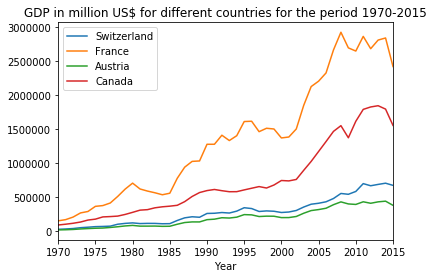

In [11]:
select_switzerland = df_useful["GDP"]['Area']=='Switzerland'
select_france = df_useful["GDP"]['Area']=='France'
select_austria = df_useful["GDP"]['Area']=='Austria'
select_canada = df_useful["GDP"]['Area']=='Canada'
ax = df_useful["GDP"][select_switzerland].plot(x ='Year', y='Value', kind = 'line')
ax = df_useful["GDP"][select_france].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = df_useful["GDP"][select_austria].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = df_useful["GDP"][select_canada].plot(x ='Year', y='Value', kind = 'line', ax = ax)
_ = ax.legend(["Switzerland", 'France', 'Austria', "Canada"])
_ = ax.set_title('GDP in million US$ for different countries for the period 1970-2015')

For dissolute or new countries, we have some Nan values (before appearing or after dissolution) as in this next example :

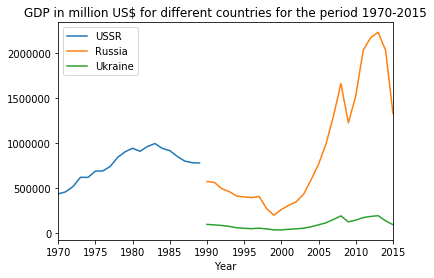

In [12]:
select_USSR = df_useful["GDP"]['Area']=='USSR'
select_russia = df_useful["GDP"]['Area']=='Russian Federation'
select_ukraine = df_useful["GDP"]['Area']=='Ukraine'
ax = df_useful["GDP"][select_USSR].plot(x ='Year', y='Value', kind = 'line')
ax = df_useful["GDP"][select_russia].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = df_useful["GDP"][select_ukraine].plot(x ='Year', y='Value', kind = 'line', ax = ax)
_ = ax.legend(["USSR", 'Russia', 'Ukraine'])
_ = ax.set_title('GDP in million US$ for different countries for the period 1970-2015')

##### 1.D.a.ii. Extracting crops harvested area, production, seed and yield from the "Crops production" dataset<a name="1Daii"></a>
We want to extract crops **harvested area**, **production**, **seed** and **yield** from the **"Crops production" dataset**. As all crops are not food crops, we request the [World crops database](https://world-crops.com/food-crops/) to **keep only the food crops**.

In [13]:
def get_food_crops():
    #Return a list of crops categorized as food crops https://world-crops.com/food-crops/
    url="https://world-crops.com/food-crops/"
    r=requests.get(url,headers={"User-Agent": "XY"})
    soup=BeautifulSoup(r.text,'html.parser')
    elements_temp=soup.find_all('a',href=re.compile("^../"))
    elements=[el.text for el in elements_temp]
    
    #only 40 elements are displayed on each page->iterating on the total list
    for i in range(40,401,40):
        url_i=url+"?ss="+str(i)
        r=requests.get(url_i,headers={"User-Agent":"XY"})
        soup=BeautifulSoup(r.text,'html.parser')
        new_elements=soup.find_all('a',href=re.compile("^../"))
        elements+=[el.text for el in new_elements]
    return elements

def inclusive_search(string,elements):
    #returns true if the string can be found in elements. The search removes special characters from string in order to include more positive results
    string=string.lower()
    delimiters = ",", "(","&",")"," and "," "
    pattern = '|'.join(map(re.escape, delimiters))
    strings=list(filter(None,re.split(pattern,string)))
    found=False
    for s in strings:
        if s=="nes":
            continue
        for el in elements:
            found=(s in el.split())
            if found==False and s[-1]=="s":
                found=s[:-1] in el.split()
            if found==False and s[-2:]=="es":
                found=s[:-2] in el.split()
            if found==False and s[-3:]=="ies":
                found=s[:-3]+"y" in el.split()
            if found==True:
                return found
    return found


def get_food_crop_data(df):    
    #extracts the food crop data, returns 4 df: Area,Production,Seed and yield    
    df=df.copy()
    food_crops=list(map(lambda x: x.lower(),get_food_crops()))              
    crop_types_df=df[['Item','Value']].groupby('Item').sum()
    crop_types_df=crop_types_df[list(map(lambda x : inclusive_search(x,food_crops) , crop_types_df.index ))]   
    food_crop_df=df[df.Item.apply(lambda x: x in crop_types_df.index)]
    return (food_crop_df[food_crop_df.Element=='Area harvested'],
            food_crop_df[food_crop_df.Element=='Production'],
            food_crop_df[food_crop_df.Element=='Seed'],
            food_crop_df[food_crop_df.Element=='Yield'])
  
food_crop_area_df , food_crop_production_df , food_crop_seed_df , food_crop_yield_df = get_food_crop_data(df["Crops production"])

In [14]:
df_useful['Crops Area harvested'] = food_crop_area_df.drop(columns=['Item Code', "Element Code", "Element", "Year Code", "Flag"])
df_useful['Crops Production'] = food_crop_production_df.drop(columns=['Item Code', "Element Code", "Element", "Year Code", "Flag"])
df_useful['Crops Seed'] = food_crop_seed_df.drop(columns=['Item Code', "Element Code", "Element", "Year Code", "Flag"])
df_useful['Crops Yield'] =  food_crop_yield_df.drop(columns=['Item Code', "Element Code", "Element", "Year Code", "Flag"])

We check everything is fine by looking at samples for each of the new dataframes:

In [15]:
display('Crops Area harvested', df_useful['Crops Area harvested'].sample(5))
display('Crops Production', df_useful['Crops Production'].sample(5))
display('Crops Seed', df_useful['Crops Seed'].sample(5))
display('Crops Yield', df_useful['Crops Yield'].sample(5))

'Crops Area harvested'

Area Code            Area                       Item  Year Unit  \
1563166         38       Sri Lanka                 Beans, dry  2002   ha   
734432          90          Guinea                  Nuts, nes  1990   ha   
1808422        235      Uzbekistan  Chillies and peppers, dry  2010   ha   
2282951       5400          Europe            Castor oil seed  1982   ha   
478194          51  Czechoslovakia               Beans, green  1975   ha   

            Value  
1563166   11250.0  
734432        NaN  
1808422    1600.0  
2282951  168256.0  
478194     1160.0

'Crops Production'

Area Code                               Area                    Item  \
2553686       5815  Low Income Food Deficit Countries            Mustard seed   
1152391        144                         Mozambique                Tomatoes   
1095081        137                          Mauritius  Roots and Tubers,Total   
2424543       5502                          Melanesia              Pineapples   
1187247        150                        Netherlands  Eggplants (aubergines)   

         Year    Unit    Value  
2553686  1963  tonnes  70680.0  
1152391  1996  tonnes   9500.0  
1095081  2007  tonnes  16779.0  
2424543  1964  tonnes   6050.0  
1187247  2008  tonnes  43000.0

'Crops Seed'

Area Code                                     Area            Item  \
1350962        173                                   Poland          Lupins   
239099         233                             Burkina Faso           Fonio   
2103275       5204                          Central America  Sweet potatoes   
122654          16                               Bangladesh         Sorghum   
2572695       5817  Net Food Importing Developing Countries         Cassava   

         Year    Unit    Value  
1350962  1985  tonnes  17320.0  
239099   2011  tonnes    966.0  
2103275  2014  tonnes   3650.0  
122654   1980  tonnes     39.0  
2572695  1973  tonnes     80.0

'Crops Yield'

Area Code                         Area                          Item  \
1759493        215  United Republic of Tanzania     Fruit, tropical fresh nes   
1529521        202                 South Africa           Carrots and turnips   
411561          46                        Congo                      Potatoes   
1495790        197                 Sierra Leone        Groundnuts, with shell   
1533616        202                 South Africa  Mangoes, mangosteens, guavas   

         Year   Unit     Value  
1759493  1965  hg/ha   25556.0  
1529521  1985  hg/ha  260000.0  
411561   1972  hg/ha   69231.0  
1495790  1981  hg/ha    5263.0  
1533616  1981  hg/ha   94887.0

We also make some plots to have a first understanding of the dataset:

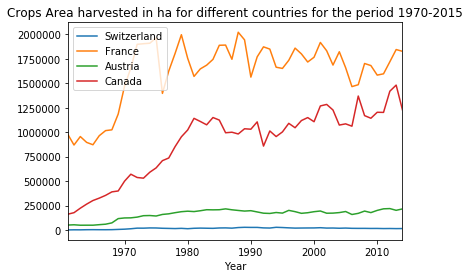

In [16]:
select_Maize = df_useful['Crops Area harvested']['Item']=='Maize'
maize_df = df_useful['Crops Area harvested'][select_Maize]

select_switzerland = maize_df['Area']=='Switzerland'
select_france = maize_df['Area']=='France'
select_austria = maize_df['Area']=='Austria'
select_canada = maize_df['Area']=='Canada'
ax = maize_df[select_switzerland].plot(x ='Year', y='Value', kind = 'line')
ax = maize_df[select_france].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = maize_df[select_austria].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = maize_df[select_canada].plot(x ='Year', y='Value', kind = 'line', ax = ax)
_ = ax.legend(["Switzerland", 'France', 'Austria', "Canada"])
_ = ax.set_title('Crops Area harvested in ha for different countries for the period 1970-2015')

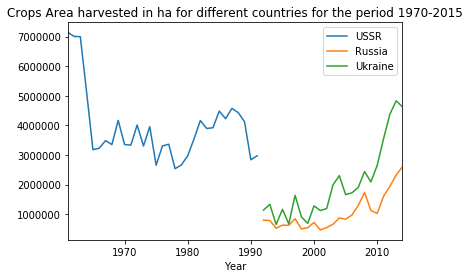

In [17]:
select_USSR = maize_df['Area']=='USSR'
select_russia = maize_df['Area']=='Russian Federation'
select_ukraine = maize_df['Area']=='Ukraine'
ax = maize_df[select_USSR].plot(x ='Year', y='Value', kind = 'line')
ax = maize_df[select_russia].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = maize_df[select_ukraine].plot(x ='Year', y='Value', kind = 'line', ax = ax)
_ = ax.legend(["USSR", 'Russia', 'Ukraine'])
_ = ax.set_title('Crops Area harvested in ha for different countries for the period 1970-2015')

##### 1.D.a.iii. Extracting stocks production from the "Livestock production" dataset<a name="1Daiii"></a>

We want to extract **stocks production** from the **"Livestock production" dataset**. Again, we drop the columns that are useless for us and have a first look of the data with a sample and some plots.

In [18]:
selection_stocks = df['Livestock production']["Element"] == 'Stocks'
df_useful['Livestock production'] = df['Livestock production'][selection_stocks].drop(columns=['Item Code', "Element Code", "Element", "Year Code", "Flag"])

In [19]:
display(df_useful['Livestock production'].sample(5))

Area Code                         Area    Item  Year  Unit       Value
115173        217                         Togo    Pigs  1994  Head    420600.0
72161         134                        Malta  Cattle  1981  Head     11385.0
57204         102   Iran (Islamic Republic of)  Cattle  1995  Head   8347000.0
121209        215  United Republic of Tanzania   Asses  1978  Head    162000.0
4377            9                    Argentina   Sheep  1963  Head  46157904.0

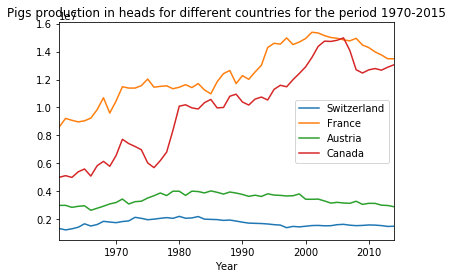

In [20]:
select_pigs = df_useful['Livestock production']['Item']=='Pigs'
pigs_df = df_useful['Livestock production'][select_pigs]

select_switzerland = pigs_df['Area']=='Switzerland'
select_france = pigs_df['Area']=='France'
select_austria = pigs_df['Area']=='Austria'
select_canada = pigs_df['Area']=='Canada'
ax = pigs_df[select_switzerland].plot(x ='Year', y='Value', kind = 'line')
ax = pigs_df[select_france].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = pigs_df[select_austria].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = pigs_df[select_canada].plot(x ='Year', y='Value', kind = 'line', ax = ax)
_ = ax.legend(["Switzerland", 'France', 'Austria', "Canada"])
_ = ax.set_title('Pigs production in heads for different countries for the period 1970-2015')

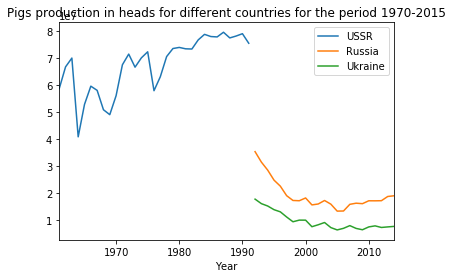

In [21]:
select_USSR = pigs_df['Area']=='USSR'
select_russia = pigs_df['Area']=='Russian Federation'
select_ukraine = pigs_df['Area']=='Ukraine'
ax = pigs_df[select_USSR].plot(x ='Year', y='Value', kind = 'line')
ax = pigs_df[select_russia].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = pigs_df[select_ukraine].plot(x ='Year', y='Value', kind = 'line', ax = ax)
_ = ax.legend(["USSR", 'Russia', 'Ukraine'])
_ = ax.set_title('Pigs production in heads for different countries for the period 1970-2015')

##### 1.D.a.iv. Extracting import and export quantities from the "Live animals trade" and "Crops trade" datasets<a name="1Daiv"></a>
Now, we extract **import and export quantities** from the **"Live animals trade" and "Crops trade" datasets**, having again some samples and some plots.

In [22]:
selection_import_quantities = df['Live animals trade']["Element"] == 'Import Quantity'
selection_export_quantities = df['Live animals trade']["Element"] == 'Export Quantity'

df_useful['Live animals import quantities'] = df['Live animals trade'][selection_import_quantities].drop(columns=['Item Code', "Element Code", "Element", "Year Code", "Flag"])
df_useful['Live animals export quantities'] = df['Live animals trade'][selection_export_quantities].drop(columns=['Item Code', "Element Code", "Element", "Year Code", "Flag"])

In [23]:
display(df_useful['Live animals import quantities'].sample(5))

Area Code               Area             Item  Year       Unit  \
267653        122            Lesotho             Pigs  1992       Head   
401251        194       Saudi Arabia           Cattle  1968       Head   
297393        138             Mexico         Beehives  1997         No   
470238        223             Turkey            Ducks  2007  1000 Head   
67318          26  Brunei Darussalam  Bovine, Animals  1970       Head   

          Value  
267653     49.0  
401251  71678.0  
297393      3.0  
470238      2.0  
67318    2234.0

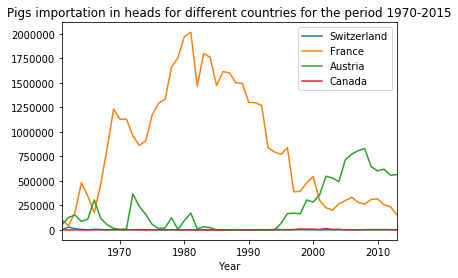

In [24]:
select_pigs = df_useful['Live animals import quantities']['Item']=='Pigs'
pigs_df = df_useful['Live animals import quantities'][select_pigs]

select_switzerland = pigs_df['Area']=='Switzerland'
select_france = pigs_df['Area']=='France'
select_austria = pigs_df['Area']=='Austria'
select_canada = pigs_df['Area']=='Canada'
ax = pigs_df[select_switzerland].plot(x ='Year', y='Value', kind = 'line')
ax = pigs_df[select_france].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = pigs_df[select_austria].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = pigs_df[select_canada].plot(x ='Year', y='Value', kind = 'line', ax = ax)
_ = ax.legend(["Switzerland", 'France', 'Austria', "Canada"])
_ = ax.set_title('Pigs importation in heads for different countries for the period 1970-2015')

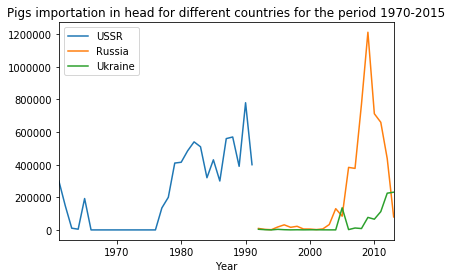

In [25]:
select_USSR = pigs_df['Area']=='USSR'
select_russia = pigs_df['Area']=='Russian Federation'
select_ukraine = pigs_df['Area']=='Ukraine'
ax = pigs_df[select_USSR].plot(x ='Year', y='Value', kind = 'line')
ax = pigs_df[select_russia].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = pigs_df[select_ukraine].plot(x ='Year', y='Value', kind = 'line', ax = ax)
_ = ax.legend(["USSR", 'Russia', 'Ukraine'])
_ = ax.set_title('Pigs importation in head for different countries for the period 1970-2015')

In [26]:
display(df_useful['Live animals export quantities'].sample(5))

Area Code             Area             Item  Year       Unit    Value
367540        173           Poland          Turkeys  1972  1000 Head      NaN
345059        221             Oman            Goats  1982       Head  14000.0
549843       5104  Southern Africa          Turkeys  1969  1000 Head      0.0
39711          57          Belarus  Bovine, Animals  1993       Head   3200.0
252702        114            Kenya            Goats  1968       Head  20000.0

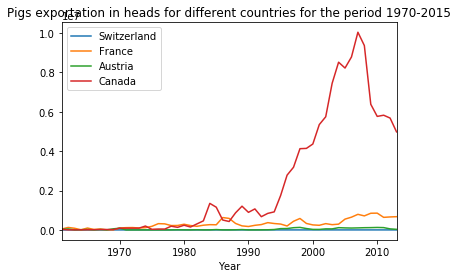

In [27]:
select_pigs = df_useful['Live animals export quantities']['Item']=='Pigs'
pigs_df = df_useful['Live animals export quantities'][select_pigs]

select_switzerland = pigs_df['Area']=='Switzerland'
select_france = pigs_df['Area']=='France'
select_austria = pigs_df['Area']=='Austria'
select_canada = pigs_df['Area']=='Canada'
ax = pigs_df[select_switzerland].plot(x ='Year', y='Value', kind = 'line')
ax = pigs_df[select_france].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = pigs_df[select_austria].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = pigs_df[select_canada].plot(x ='Year', y='Value', kind = 'line', ax = ax)
_ = ax.legend(["Switzerland", 'France', 'Austria', "Canada"])
_ = ax.set_title('Pigs exportation in heads for different countries for the period 1970-2015')

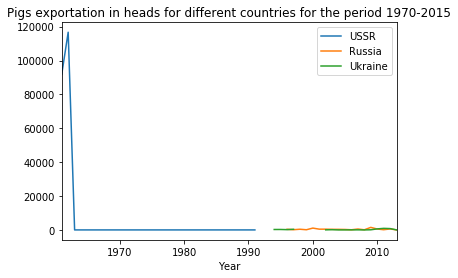

In [28]:
select_USSR = pigs_df['Area']=='USSR'
select_russia = pigs_df['Area']=='Russian Federation'
select_ukraine = pigs_df['Area']=='Ukraine'
ax = pigs_df[select_USSR].plot(x ='Year', y='Value', kind = 'line')
ax = pigs_df[select_russia].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = pigs_df[select_ukraine].plot(x ='Year', y='Value', kind = 'line', ax = ax)
_ = ax.legend(["USSR", 'Russia', 'Ukraine'])
_ = ax.set_title('Pigs exportation in heads for different countries for the period 1970-2015')

In [29]:
selection_import_quantities = df['Food trade']["Element"] == 'Import Quantity'
selection_export_quantities = df['Food trade']["Element"] == 'Export Quantity'

df_useful['Food import quantities'] = df['Food trade'][selection_import_quantities].drop(columns=['Item Code', "Element Code", "Element", "Year Code", "Flag"])
df_useful['Food export quantities'] = df['Food trade'][selection_export_quantities].drop(columns=['Item Code', "Element Code", "Element", "Year Code", "Flag"])

In [30]:
display(df_useful['Food import quantities'].sample(5))

Area Code                      Area  \
3215241          54                   Denmark   
5200015         104                   Ireland   
10249398        217                      Togo   
1991525          37  Central African Republic   
8442987         117         Republic of Korea   

                                         Item  Year    Unit    Value  
3215241                               Tobacco  1964  tonnes  16656.0  
5200015                            Meat, goat  1997  tonnes      0.0  
10249398                       Natural Rubber  1987  tonnes      1.0  
1991525   Buttermilk, curdled, acidified milk  1994  tonnes      1.0  
8442987                         Oil, rapeseed  1970  tonnes     70.0

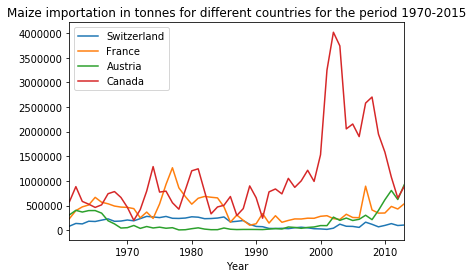

In [31]:
select_Maize = df_useful['Food import quantities']['Item']=='Maize'
maize_df = df_useful['Food import quantities'][select_Maize]

select_switzerland = maize_df['Area']=='Switzerland'
select_france = maize_df['Area']=='France'
select_austria = maize_df['Area']=='Austria'
select_canada = maize_df['Area']=='Canada'
ax = maize_df[select_switzerland].plot(x ='Year', y='Value', kind = 'line')
ax = maize_df[select_france].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = maize_df[select_austria].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = maize_df[select_canada].plot(x ='Year', y='Value', kind = 'line', ax = ax)
_ = ax.legend(["Switzerland", 'France', 'Austria', "Canada"])
_ = ax.set_title('Maize importation in tonnes for different countries for the period 1970-2015')

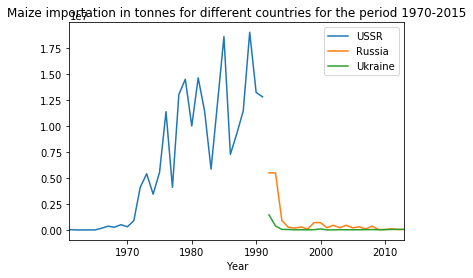

In [32]:
select_USSR = maize_df['Area']=='USSR'
select_russia = maize_df['Area']=='Russian Federation'
select_ukraine = maize_df['Area']=='Ukraine'
ax = maize_df[select_USSR].plot(x ='Year', y='Value', kind = 'line')
ax = maize_df[select_russia].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = maize_df[select_ukraine].plot(x ='Year', y='Value', kind = 'line', ax = ax)
_ = ax.legend(["USSR", 'Russia', 'Ukraine'])
_ = ax.set_title('Maize importation in tonnes for different countries for the period 1970-2015')

In [33]:
display(df_useful['Food export quantities'].sample(5))

Area Code          Area                                  Item  Year  \
7778436         165      Pakistan                  Glucose and dextrose  1986   
10998881        234       Uruguay                  Coconuts, desiccated  1989   
11047297        234       Uruguay                                 Wheat  1963   
4065106          75        Gambia  Meat, cattle, boneless (beef & veal)  1966   
11609368        268  EU(25)ex.int                      Cake, cottonseed  1993   

            Unit    Value  
7778436   tonnes    185.0  
10998881  tonnes      NaN  
11047297  tonnes  48657.0  
4065106   tonnes      NaN  
11609368  tonnes     10.0

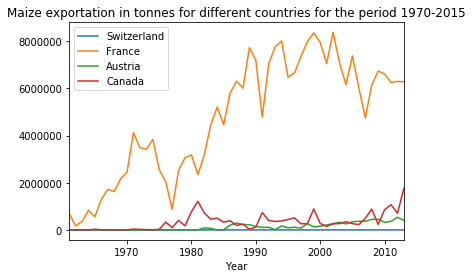

In [34]:
select_Maize = df_useful['Food export quantities']['Item']=='Maize'
maize_df = df_useful['Food export quantities'][select_Maize]

select_switzerland = maize_df['Area']=='Switzerland'
select_france = maize_df['Area']=='France'
select_austria = maize_df['Area']=='Austria'
select_canada = maize_df['Area']=='Canada'
ax = maize_df[select_switzerland].plot(x ='Year', y='Value', kind = 'line')
ax = maize_df[select_france].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = maize_df[select_austria].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = maize_df[select_canada].plot(x ='Year', y='Value', kind = 'line', ax = ax)
_ = ax.legend(["Switzerland", 'France', 'Austria', "Canada"])
_ = ax.set_title('Maize exportation in tonnes for different countries for the period 1970-2015')

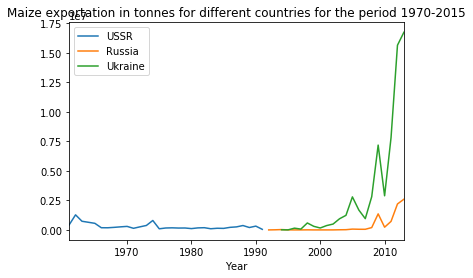

In [35]:
select_USSR = maize_df['Area']=='USSR'
select_russia = maize_df['Area']=='Russian Federation'
select_ukraine = maize_df['Area']=='Ukraine'
ax = maize_df[select_USSR].plot(x ='Year', y='Value', kind = 'line')
ax = maize_df[select_russia].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = maize_df[select_ukraine].plot(x ='Year', y='Value', kind = 'line', ax = ax)
_ = ax.legend(["USSR", 'Russia', 'Ukraine'])
_ = ax.set_title('Maize exportation in tonnes for different countries for the period 1970-2015')

##### 1.D.a.v. Extracting average CPI of each year from the "Consumer price indices" dataset<a name="1Dav"></a>

The **"Consumer price indices" dataset** contains **monthly data**. In order to have a **uniform dataframe**, and as other dataframes have **yearly data**, we group it by (Country, Year) and compute the mean over the monthes.

In [36]:
df_useful['Consumer price indices'] =  df['Consumer price indices'][['Area',"Year",'Value']] \
                                        .dropna() \
                                        .groupby(['Area',"Year"]) \
                                        .mean() \
                                        .reset_index() \
                                        .dropna()

With samples and plots, we remark that this dataset **only start in 2000** wheareas other ones start in 1970.

In [37]:
display(df_useful['Consumer price indices'].sample(5))

Area  Year       Value
3088    Trinidad and Tobago  2003   83.338459
3079                  Tonga  2012  106.874292
2633  Sao Tome and Principe  2011  114.320902
2401               Portugal  2003   88.730413
408                  Brazil  2000   50.709952

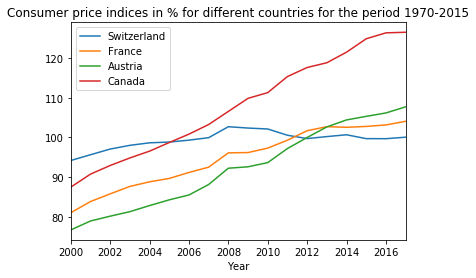

In [38]:
select_switzerland = df_useful['Consumer price indices']['Area']=='Switzerland'
select_france = df_useful['Consumer price indices']['Area']=='France'
select_austria = df_useful['Consumer price indices']['Area']=='Austria'
select_canada = df_useful['Consumer price indices']['Area']=='Canada'
ax = df_useful['Consumer price indices'][select_switzerland].plot(x ='Year', y='Value', kind = 'line')
ax = df_useful['Consumer price indices'][select_france].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = df_useful['Consumer price indices'][select_austria].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = df_useful['Consumer price indices'][select_canada].plot(x ='Year', y='Value', kind = 'line', ax = ax)
_ = ax.legend(["Switzerland", 'France', 'Austria', "Canada"])
_ = ax.set_title('Consumer price indices in % for different countries for the period 1970-2015')

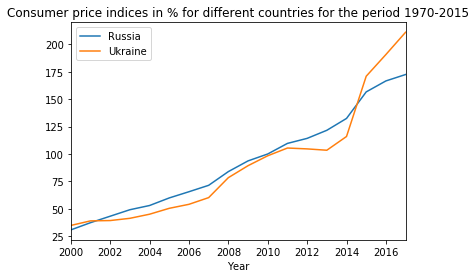

In [39]:
select_russia = df_useful["Consumer price indices"]['Area']=='Russian Federation'
select_ukraine = df_useful["Consumer price indices"]['Area']=='Ukraine'
ax = df_useful["Consumer price indices"][select_russia].plot(x ='Year', y='Value', kind = 'line')
ax = df_useful["Consumer price indices"][select_ukraine].plot(x ='Year', y='Value', kind = 'line', ax = ax)
_ = ax.legend(['Russia', 'Ukraine'])
_ = ax.set_title('Consumer price indices in % for different countries for the period 1970-2015')

##### 1.D.a.vi. Removing areas which are not countries <a name="1Davi"></a>

Having a more detailled look at the dataset, we have remarked that the **areas which are real countries** are exactely the ones with an "Area Code" below $5000$ but not in $[261, 269]$.

In [40]:
#remove Area code >= 5000 or in [261, 269] (EU)
for df_name in df_useful :
    if 'Area Code' in df_useful[df_name].keys() : 
        print ("Removing areas which are not countries in", df_name)
        selection_countries = df_useful[df_name]['Area Code']<261 
        selection_countries = selection_countries | (df_useful[df_name]['Area Code']>269)
        selection_countries = selection_countries & (df_useful[df_name]['Area Code']<5000)
        df_useful[df_name] = df_useful[df_name][selection_countries]
        display(df_useful[df_name].sample(5))
    else :
        print (df_name, "is already clean")

Removing areas which are not countries in GDP


Area Code                      Area  Year          Value
454232        210                    Sweden  1982  112767.695010
475539        220       Trinidad and Tobago  2010   22157.966489
86616          33                    Canada  1991  610319.305240
485263        224  Turks and Caicos Islands  2012     715.722768
66412         239    British Virgin Islands  2013     915.601000

Removing areas which are not countries in Crops Area harvested


Area Code    Area                          Item  Year Unit      Value
1002786        124   Libya  Cabbages and other brassicas  2014   ha      306.0
809892         100   India        Roots and Tubers,Total  1974   ha  1130600.0
684821          84  Greece           Carrots and turnips  1966   ha      500.0
1852585        249   Yemen        Roots and Tubers,Total  2013   ha    22572.0
652249          75  Gambia                   Rice, paddy  1963   ha    25495.0

Removing areas which are not countries in Crops Production


Area Code                        Area                     Item  Year  \
1683218        220         Trinidad and Tobago                  Oranges  1996   
47269            8         Antigua and Barbuda               Pineapples  1989   
774490          95                    Honduras  Fruit excl Melons,Total  1965   
830790         102  Iran (Islamic Republic of)                   Millet  1974   
81273           10                   Australia                 Soybeans  2005   

           Unit     Value  
1683218  tonnes    7140.0  
47269    tonnes     130.0  
774490   tonnes  859263.0  
830790   tonnes    5000.0  
81273    tonnes   54000.0

Removing areas which are not countries in Crops Seed


Area Code        Area                    Item  Year    Unit    Value
1022596        129  Madagascar           Cow peas, dry  1998  tonnes    141.0
856410         104     Ireland                     Rye  1979  tonnes     26.0
149383          23      Belize  Groundnuts, with shell  2003  tonnes      4.0
1404416        182     Réunion              Beans, dry  1975  tonnes     30.0
1725664        226      Uganda              Beans, dry  1975  tonnes  21745.0

Removing areas which are not countries in Crops Yield


Area Code          Area                       Item  Year   Unit  \
975666         119        Latvia                     Garlic  2003  hg/ha   
239428         233  Burkina Faso  Grapefruit (inc. pomelos)  2014  hg/ha   
1071034        134         Malta                     Grapes  1979  hg/ha   
674529          81         Ghana           Fruit, fresh nes  2007  hg/ha   
1096427        138        Mexico                  Asparagus  1979  hg/ha   

            Value  
975666    34027.0  
239428   150306.0  
1071034   56250.0  
674529    38259.0  
1096427   51334.0

Removing areas which are not countries in Livestock production


Area Code                            Area           Item  Year  \
25190         128                China, Macao SAR  Poultry Birds  2013   
114957        217                            Togo         Cattle  1994   
14148          20                        Botswana         Horses  1964   
86326         299  Occupied Palestinian Territory       Chickens  1967   
42458          68                          France          Goats  1973   

             Unit     Value  
25190   1000 Head     730.0  
114957       Head  227100.0  
14148        Head    8664.0  
86326   1000 Head       NaN  
42458        Head  898700.0

Removing areas which are not countries in Live animals import quantities


Area Code               Area              Item  Year  Unit  Value
441071        210             Sweden          Beehives  1988    No    NaN
261737        119             Latvia  Animals live nes  2011  Head    0.0
66251          26  Brunei Darussalam            Horses  1963  Head    0.0
85710          33             Canada             Mules  1971  Head    NaN
198293         89          Guatemala         Buffaloes  1967  Head    NaN

Removing areas which are not countries in Live animals export quantities


Area Code       Area               Item  Year       Unit  Value
333744        158      Niger               Pigs  2009       Head    0.0
188931         81      Ghana              Mules  1986       Head    NaN
21856          10  Australia               Pigs  2003       Head  556.0
32330          13    Bahrain  Rabbits and hares  1961  1000 Head    NaN
437022        207   Suriname    Bovine, Animals  1967       Head    0.0

Removing areas which are not countries in Food import quantities


Area Code              Area                            Item  Year  \
592668          52        Azerbaijan  Juice, pineapple, concentrated  1992   
8083077        171       Philippines        Alfalfa meal and pellets  1983   
8734556        189       Saint Lucia                           Dates  2009   
2301812        128  China, Macao SAR     Flour, roots and tubers nes  1966   
1385251         21            Brazil          Cotton, carded, combed  1987   

           Unit  Value  
592668   tonnes    NaN  
8083077  tonnes    0.0  
8734556  tonnes    2.0  
2301812  tonnes    0.0  
1385251  tonnes   49.0

Removing areas which are not countries in Food export quantities


Area Code       Area                 Item  Year    Unit    Value
11078558        228       USSR      Wool, degreased  1980  tonnes   1574.0
5025761         101  Indonesia           Pistachios  2007  tonnes      1.0
3872677          68     France        Coffee, green  1980  tonnes  12266.0
1569190          27   Bulgaria  Offals, liver geese  1963  tonnes      NaN
7364045         157  Nicaragua         Flour, maize  1991  tonnes      0.0

Consumer price indices is already clean


#### 1.D.b. Handling of the missing data  <a name="1Db"></a>

In this section, we will explain how we will handle the missing data in previous dataframes for maps.

##### 1.D.b.i. Highlighting the problem  <a name="1Dbi"></a> 

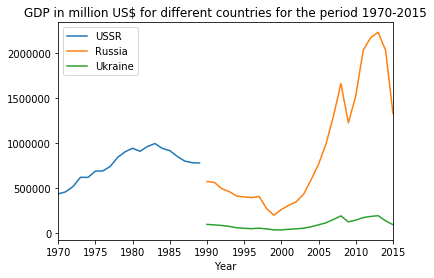

In [41]:
select_USSR = df_useful["GDP"]['Area']=='USSR'
select_russia = df_useful["GDP"]['Area']=='Russian Federation'
select_ukraine = df_useful["GDP"]['Area']=='Ukraine'
ax = df_useful["GDP"][select_USSR].plot(x ='Year', y='Value', kind = 'line')
ax = df_useful["GDP"][select_russia].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = df_useful["GDP"][select_ukraine].plot(x ='Year', y='Value', kind = 'line', ax = ax)
_ = ax.legend(["USSR", 'Russia', 'Ukraine'])
_ = ax.set_title('GDP in million US$ for different countries for the period 1970-2015')

In order to **vizualize folium maps**, we need to **associate each country a value**. The geojson file that we use is not timestamped and **only countries that exist nowadays** are inside it. As **some countries has been dissolved** during the past 50 years, our folium maps won't be complete. For instance, we do not have any value for Ukraine from 1970 to 1989. Our idea to fix this issue is presented in the next paragraph.

##### 1.D.b.ii. Proposed correction  <a name="1Dbii"></a> 


Our idea is to **map the former country value to each of the current ones**. For instance in 1982, USSR GDP is around one trillion \\$. Therefore, if we associate (**only for folium map purposes**) this value to each current country that succeeded USSR, **all these countries will appear the same color** in the folium map, i.e. all the USSR area will appear the same color (and the good one).

In order to do so, one need to **identify which countries appeared and disappeared** from the dataset and **at which year**. Then we will use this result along with some **historical research** in our `visualise_world_data_folium` function ([1.E.a.](#1Ea)).

In [42]:
countries_formation_years = {}
for country in df_useful["GDP"]["Area"].unique():
    selection = df_useful["GDP"]["Area"] == country
    year_in, year_out = df_useful["GDP"][selection].dropna()["Year"].min(), df_useful["GDP"][selection].dropna()["Year"].max()
    for year in (year_in, year_out):
        if year not in countries_formation_years :
            countries_formation_years[year] = []
    countries_formation_years[year_in].append((country,'+'))
    countries_formation_years[year_out].append((country,'-'))

countries_formation_years.pop(1970)
countries_formation_years.pop(2015)
for year in sorted(list(countries_formation_years)):
    print (year, countries_formation_years[year])

1988 [('Yemen Ar Rp', '-'), ('Yemen Dem', '-')]
1989 [('Czechoslovakia', '-'), ('Ethiopia PDR', '-'), ('USSR', '-'), ('Yemen', '+'), ('Yugoslav SFR', '-')]
1990 [('Armenia', '+'), ('Azerbaijan', '+'), ('Belarus', '+'), ('Bosnia and Herzegovina', '+'), ('Croatia', '+'), ('Czechia', '+'), ('Eritrea', '+'), ('Estonia', '+'), ('Ethiopia', '+'), ('Georgia', '+'), ('Kazakhstan', '+'), ('Kyrgyzstan', '+'), ('Latvia', '+'), ('Lithuania', '+'), ('Montenegro', '+'), ('Republic of Moldova', '+'), ('Russian Federation', '+'), ('Serbia', '+'), ('Slovakia', '+'), ('Slovenia', '+'), ('Tajikistan', '+'), ('The former Yugoslav Republic of Macedonia', '+'), ('Timor-Leste', '+'), ('Turkmenistan', '+'), ('Ukraine', '+'), ('Uzbekistan', '+')]
1999 [('Kosovo', '+')]
2005 [('Curaçao', '+'), ('Sint Maarten (Dutch Part)', '+')]
2007 [('Sudan (former)', '-')]
2008 [('South Sudan', '+'), ('Sudan', '+')]
2012 [('Netherlands Antilles (former)', '-')]


### 1.E. Preprocessing the data set  <a name="1E"></a>

In this part, we will finish prepocessing the datasets. More precisely, we will deal with **country names** and **normalizing** the features.

1.  
    5. 
    
        1. [Converting country names between different naming conventions](#1Ea)
        
        2. [Normalization and log scales](#1Eb)

#### 1.E.a. Converting country names between different naming conventions  <a name="1Ea"></a>
Some countries have **different names in the geojson file and in the dataset**. We first start by correcting them.

In [43]:
def correct_country_names(old_name, dic):
    if old_name in dic.keys() :
        return dic[old_name]
    return old_name

In [44]:
dic = {'Czechia': "Czech Republic",
       'Russian Federation':'Russia',
       "Serbia":"Republic of Serbia",
       'The former Yugoslav Republic of Macedonia':'Macedonia',
       'China, mainland':'China',
       'Viet Nam':'Vietnam',
       'Venezuela (Bolivarian Republic of)':'Venezuela',
       'Iran (Islamic Republic of)':'Iran',
       'Syrian Arab Republic':"Syria",
       'Bolivia (Plurinational State of)': 'Bolivia',
       "Côte d'Ivoire": "Ivory Coast",
       'Congo':"Republic of the Congo",
       "Lao People's Democratic Republic":'Laos',
       "Democratic People's Republic of Korea":"North Korea",
       'Republic of Korea':"South Korea"}

for df_name in df_useful :
    print (df_name)
    df_useful[df_name]["Area"] = df_useful[df_name]["Area"].apply(lambda x : correct_country_names(x,dic))

GDP
Crops Area harvested
Crops Production
Crops Seed
Crops Yield
Livestock production
Live animals import quantities
Live animals export quantities
Food import quantities
Food export quantities
Consumer price indices


Then, we do a function that takes as input **a dataframe and a year** and produces the **corresponding folium map**. This function also h**andles dissolutions of countries** as suggested [before](#1Dbii).

In [45]:
def visualise_world_data_folium(df, year, logScale=True):
    dic = {'USSR':                            ['Armenia', 'Azerbaijan','Belarus', 'Estonia', 'Georgia',
                                               'Kazakhstan', 'Kyrgyzstan', 'Latvia', 'Lithuania',
                                               'Montenegro', 'Republic of Moldova', 'Russia',
                                               'Republic of Serbia', 'Timor-Leste', 'Turkmenistan', 'Ukraine',
                                               'Uzbekistan'],
           'Ethiopia PDR':                     ['Eritrea','Ethiopia'],
           'Yugoslav SFR':                     ['Kosovo', 'Slovenia', 'Croatia',
                                                'Macedonia', 'Bosnia and Herzegovina'],
           'Yemen Dem' :                       ['Yemen'],        
           'Czechoslovakia':                   ["Czech Republic", 'Slovakia'],
           'Netherlands Antilles (former)':    ['Curaçao', 'Sint Maarten (Dutch Part)'],
           'Sudan (former)':                   ['South Sudan', 'Sudan']
          }
    to_plot=df[df["Year"]==year]
    to_plot=(to_plot[['Area','Value']]
             .dropna()
             .groupby('Area')             
             .mean()
             .reset_index()
             .dropna()) 
    to_plot['Area']=to_plot['Area'].apply(lambda x : correct_country_names(x, dic))
    to_plot = to_plot.explode('Area')
    if logScale :
        to_plot.Value=np.log10(1+to_plot.Value)
    
    m = folium.Map(location=[40,-10],zoom_start=1.6)
    folium.Choropleth(
        geo_data=f"https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/world-countries.json",
        data=to_plot,
        columns=['Area', 'Value'],
        key_on='feature.properties.name',
        fill_color='YlGn',fill_opacity=0.7,line_opacity=0.2,nan_fill_opacity=0.0
    ).add_to(m)

    folium.LayerControl().add_to(m)

    return(m)

We can know use it to produce some maps. For instance, we plot below the map of GDP for the year 1985 (before dissolution of USSR) and 1995 (after).

In [46]:
display(visualise_world_data_folium(df_useful["GDP"], 1985, True))
display(visualise_world_data_folium(df_useful["GDP"], 1995, True))

#### 1.E.b. Normalization and log scales  <a name="1Eb"></a>

Some of our features **seem to be right skewed**. At first glance it seems that they look like power laws.

For instance the distribution of GDP look a bit like a power law:

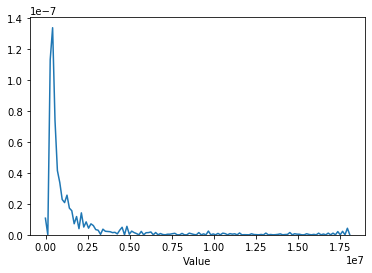

In [47]:
_ = sns.distplot(df_useful["GDP"]["Value"], rug=False, hist=False)

As we later want to train some Machine Learning models, we log those values so that their distribution look a bit **more like a normal distribution**.

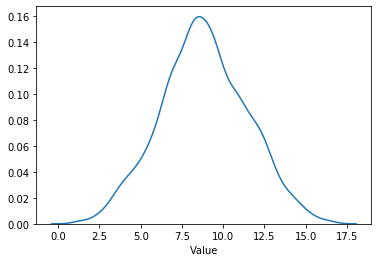

In [48]:
#looks better with log scale
_ = sns.distplot(np.log(df_useful["GDP"]["Value"]), rug=False, hist=False)

The new distribution indeed looks better to train models on it.

### 1.F. Making one uniformized dataframe  <a name="1F"></a>

In this part, we will make one **uniformized dataframe** `uni_df` with the following columns.


    Country | Year | GDP | Crops production columns | Livestock production columns | Crops importation columns | Livestock importation columns | Crops exportation columns | Livestock exportation columns | CPI
    
In this uniformized dataframe, **a tuple `(Country, Year)` uniquely identifies a row**.


#### 1.F.a. Pivoting dataframes with items  <a name="1Fa"></a>

The current dataframes have several rows for a given `(Country, Year)`. Each of this row correspond to one item. We would like to have a unique row for a given `(Country, Year)` and one column per item:

In [49]:
need_pivot = ['Crops Area harvested',
              'Crops Production',
              'Crops Seed',
              'Crops Yield',
              'Livestock production',
              'Live animals import quantities',
              'Live animals export quantities',
              'Food import quantities',
              'Food export quantities']

def rename_columns(x, word):
    if x not in ['Area', 'Year', 'ha', 'tonnes', 'hg/ha', 'Head', '1000 Head']:
        return x + ' ' + word
    return x

df_useful['GDP'] = df_useful['GDP'].rename(columns = {'Value':'(GDP, million $)'})[["Area",'Year','(GDP, million $)']]
df_useful['Consumer price indices'] = df_useful['Consumer price indices'].rename(columns = {'Value':'(Consumer price indices, %)'})[["Area",'Year','(Consumer price indices, %)']]

for df_name in need_pivot :
    df_useful[df_name] = pd.pivot_table(df_useful[df_name], index=["Area",'Year'], columns=["Item","Unit"], values="Value").rename(columns=lambda x: rename_columns(x, df_name))
    display(df_name, df_useful[df_name].sample(5))

'Crops Area harvested'

Item                                  Anise, badian, fennel, coriander Crops Area harvested  \
Unit                                                                                     ha   
Area                             Year                                                         
Iran                             1965                                             6500.0      
Maldives                         1995                                                NaN      
Democratic Republic of the Congo 1998                                                NaN      
Honduras                         2012                                                NaN      
Guam                             1967                                                NaN      

Item                                  Apples Crops Area harvested  \
Unit                                                           ha   
Area                             Year                               
Iran                             1965                     21000.0   
Maldives                         1995                         NaN   
Democratic Republic of the Congo 1998                         NaN   
Honduras                         2012                        84.0   
Guam                             1967                         NaN   

Item                                  Apricots Crops Area harvested  \
Unit                                                             ha   
Area                             Year                                 
Iran                             1965                       10000.0   
Maldives                         1995                           NaN   
Democratic Republic of the Congo 1998                           NaN   
Honduras                         2012                           NaN   
Guam                             1967                           NaN   

Item                                  Areca nuts Crops Area harvested  \
Unit                                                               ha   
Area                             Year                                   
Iran                             1965                             NaN   
Maldives                         1995                            43.0   
Democratic Republic of the Congo 1998                             NaN   
Honduras                         2012                             NaN   
Guam                             1967                             NaN   

Item                                  Artichokes Crops Area harvested  \
Unit                                                               ha   
Area                             Year                                   
Iran                             1965                             NaN   
Maldives                         1995                             NaN   
Democratic Republic of the Congo 1998                             NaN   
Honduras                         2012                             NaN   
Guam                             1967                             NaN   

Item                                  Asparagus Crops Area harvested  \
Unit                                                              ha   
Area                             Year                                  
Iran                             1965                            NaN   
Maldives                         1995                            NaN   
Democratic Republic of the Congo 1998                            NaN   
Honduras                         2012                            NaN   
Guam                             1967                            NaN   

Item                                  Avocados Crops Area harvested  \
Unit                                                             ha   
Area                             Year                                 
Iran                             1965                           NaN   
Maldives                         1995                           NaN   
Democratic Repu

'Crops Production'

Item            Anise, badian, fennel, coriander Crops Production  \
Unit                                                       tonnes   
Area       Year                                                     
Peru       2010                                            6430.0   
Colombia   2006                                               NaN   
Martinique 1970                                               NaN   
Mexico     1962                                             120.0   
Angola     2013                                               NaN   

Item            Apples Crops Production Apricots Crops Production  \
Unit                             tonnes                    tonnes   
Area       Year                                                     
Peru       2010                143861.0                     232.0   
Colombia   2006                  4518.0                       NaN   
Martinique 1970                     NaN                       NaN   
Mexico     1962                 95429.0                    5741.0   
Angola     2013                     NaN                       NaN   

Item            Areca nuts Crops Production Artichokes Crops Production  \
Unit                                 tonnes                      tonnes   
Area       Year                                                           
Peru       2010                         NaN                    127323.0   
Colombia   2006                         NaN                         NaN   
Martinique 1970                         NaN                         NaN   
Mexico     1962                         NaN                         NaN   
Angola     2013                         NaN                         NaN   

Item            Asparagus Crops Production Avocados Crops Production  \
Unit                                tonnes                    tonnes   
Area       Year                                                        
Peru       2010                   335209.0                  184370.0   
Colombia   2006                     1254.0                  191710.0   
Martinique 1970                        NaN                    2000.0   
Mexico     1962                     5000.0                  112934.0   
Angola     2013                        NaN                       NaN   

Item            Bambara beans Crops Production Bananas Crops Production  \
Unit                                    tonnes                   tonnes   
Area       Year                                                           
Peru       2010                            NaN                  78000.0   
Colombia   2006                            NaN                1863746.0   
Martinique 1970                            NaN                 160000.0   
Mexico     1962                            NaN                 710375.0   
Angola     2013                            NaN                3095013.0   

Item            Barley Crops Production  ... Sweet potatoes Crops Production  \
Unit                             tonnes  ...                          tonnes   
Area       Year                          ...                                   
Peru       2010                216193.0  ...                        263456.0   
Colombia   2006                  6591.0  ...                             NaN   
Martinique 1970                     NaN  ...                          5500.0   
Mexico     1962                151115.0  ...                        102793.0   
Angola     2013                     NaN  ...                       1199749.0   

Item            Tangerines, mandarins, clementines, satsumas Crops Production  \
Unit                                                                   tonnes   
Area       Year                                                                 
Peru       2010                                           221324.0              
Colombia   2006                                            95397.0              
Martinique 1970                                                NaN   

'Crops Seed'

Item                Anise, badian, fennel, coriander Crops Seed  \
Unit                                                     tonnes   
Area           Year                                               
United Kingdom 1974                                         NaN   
Morocco        2006                                         NaN   
Iran           1980                                         NaN   
Italy          1991                                         NaN   
Vanuatu        1981                                         NaN   

Item                Bambara beans Crops Seed Bananas Crops Seed  \
Unit                                  tonnes             tonnes   
Area           Year                                               
United Kingdom 1974                      NaN                NaN   
Morocco        2006                      NaN                NaN   
Iran           1980                      NaN                NaN   
Italy          1991                      NaN                NaN   
Vanuatu        1981                      NaN                NaN   

Item                Barley Crops Seed Beans, dry Crops Seed  \
Unit                           tonnes                tonnes   
Area           Year                                           
United Kingdom 1974          389000.0                   NaN   
Morocco        2006          159472.0                 904.0   
Iran           1980          169085.0                7600.0   
Italy          1991           93000.0                6000.0   
Vanuatu        1981               NaN                   NaN   

Item                Broad beans, horse beans, dry Crops Seed  \
Unit                                                  tonnes   
Area           Year                                            
United Kingdom 1974                                      NaN   
Morocco        2006                                   9040.0   
Iran           1980                                      NaN   
Italy          1991                                  24000.0   
Vanuatu        1981                                      NaN   

Item                Buckwheat Crops Seed  \
Unit                              tonnes   
Area           Year                        
United Kingdom 1974                  NaN   
Morocco        2006                  NaN   
Iran           1980                  NaN   
Italy          1991                  NaN   
Vanuatu        1981                  NaN   

Item                Cabbages and other brassicas Crops Seed  \
Unit                                                 tonnes   
Area           Year                                           
United Kingdom 1974                                     NaN   
Morocco        2006                                     NaN   
Iran           1980                                     NaN   
Italy          1991                                     NaN   
Vanuatu        1981                                     NaN   

Item                Carrots and turnips Crops Seed Cassava Crops Seed  ...  \
Unit                                        tonnes             tonnes  ...   
Area           Year                                                    ...   
United Kingdom 1974                            NaN                NaN  ...   
Morocco        2006                            NaN                NaN  ...   
Iran           1980                            NaN                NaN  ...   
Italy          1991                            NaN                NaN  ...   
Vanuatu        1981                            NaN                NaN  ...   

Item                Sorghum Crops Seed Soybeans Crops Seed  \
Unit                            tonnes              tonnes   
Area           Year                                          
United Kingdom 1974                NaN                 NaN   
Morocco        2006              376.0                 NaN   
Iran           1980                NaN              3303.0   
Italy          1991             1056.0             23

'Crops Yield'

Item          Anise, badian, fennel, coriander Crops Yield Apples Crops Yield  \
Unit                                                 hg/ha              hg/ha   
Area     Year                                                                   
Turkey   1988                                       7807.0           187500.0   
Cameroon 2003                                          NaN                NaN   
Suriname 2003                                          NaN                NaN   
Vanuatu  2006                                          NaN                NaN   
Panama   1971                                          NaN                NaN   

Item          Apricots Crops Yield Areca nuts Crops Yield  \
Unit                         hg/ha                  hg/ha   
Area     Year                                               
Turkey   1988              76639.0                    NaN   
Cameroon 2003              45439.0                    NaN   
Suriname 2003                  NaN                    NaN   
Vanuatu  2006                  NaN                    NaN   
Panama   1971                  NaN                    NaN   

Item          Artichokes Crops Yield Asparagus Crops Yield  \
Unit                           hg/ha                 hg/ha   
Area     Year                                                
Turkey   1988                91667.0               37500.0   
Cameroon 2003                    NaN                   NaN   
Suriname 2003                    NaN                   NaN   
Vanuatu  2006                    NaN                   NaN   
Panama   1971                    NaN                   NaN   

Item          Avocados Crops Yield Bambara beans Crops Yield  \
Unit                         hg/ha                     hg/ha   
Area     Year                                                  
Turkey   1988              40000.0                       NaN   
Cameroon 2003              40140.0                    7401.0   
Suriname 2003                  NaN                       NaN   
Vanuatu  2006                  NaN                       NaN   
Panama   1971                  NaN                       NaN   

Item          Bananas Crops Yield Barley Crops Yield  ...  \
Unit                        hg/ha              hg/ha  ...   
Area     Year                                         ...   
Turkey   1988            261584.0            21893.0  ...   
Cameroon 2003             93258.0                NaN  ...   
Suriname 2003            159750.0                NaN  ...   
Vanuatu  2006            114800.0                NaN  ...   
Panama   1971            482238.0                NaN  ...   

Item          Sweet potatoes Crops Yield  \
Unit                               hg/ha   
Area     Year                              
Turkey   1988                        NaN   
Cameroon 2003                    43491.0   
Suriname 2003                   115000.0   
Vanuatu  2006                        NaN   
Panama   1971                        NaN   

Item          Tangerines, mandarins, clementines, satsumas Crops Yield  \
Unit                                                             hg/ha   
Area     Year                                                            
Turkey   1988                                           143565.0         
Cameroon 2003                                                NaN         
Suriname 2003                                                NaN         
Vanuatu  2006                                                NaN         
Panama   1971                                                NaN         

Item          Taro (cocoyam) Crops Yield Tomatoes Crops Yield  \
Unit                               hg/ha                hg/ha   
Area     Year                                                   
Turkey   1988                    57500.0             358955.0   
Cameroon 2003                    55680.0             113462.0   
Suriname 2003                        NaN             122769.0   
Vanuatu  2006              

'Livestock production'

Item                               Animals live nes Livestock production  \
Unit                                                                Head   
Area                          Year                                         
Nigeria                       2010                                   NaN   
Netherlands Antilles (former) 1987                                   NaN   
Brazil                        1986                                   NaN   
Somalia                       1986                                   NaN   
Hungary                       1989                             2095500.0   

Item                               Asses Livestock production  \
Unit                                                     Head   
Area                          Year                              
Nigeria                       2010                  1200000.0   
Netherlands Antilles (former) 1987                     2600.0   
Brazil                        1986                  1285754.0   
Somalia                       1986                    24600.0   
Hungary                       1989                     4300.0   

Item                               Beehives Livestock production  \
Unit                                     No Livestock production   
Area                          Year                                 
Nigeria                       2010                           NaN   
Netherlands Antilles (former) 1987                           NaN   
Brazil                        1986                      550000.0   
Somalia                       1986                           NaN   
Hungary                       1989                      600000.0   

Item                               Buffaloes Livestock production  \
Unit                                                         Head   
Area                          Year                                  
Nigeria                       2010                            NaN   
Netherlands Antilles (former) 1987                            NaN   
Brazil                        1986                       984811.0   
Somalia                       1986                            NaN   
Hungary                       1989                            NaN   

Item                               Camelids, other Livestock production  \
Unit                                                               Head   
Area                          Year                                        
Nigeria                       2010                                  NaN   
Netherlands Antilles (former) 1987                                  NaN   
Brazil                        1986                                  NaN   
Somalia                       1986                                  NaN   
Hungary                       1989                                  NaN   

Item                               Camels Livestock production  \
Unit                                                      Head   
Area                          Year                               
Nigeria                       2010                    277727.0   
Netherlands Antilles (former) 1987                         NaN   
Brazil                        1986                         NaN   
Somalia                       1986                   6378000.0   
Hungary                       1989                         NaN   

Item                               Cattle Livestock production  \
Unit                                                      Head   
Area                          Year                               
Nigeria                       2010                  16577962.0   
Netherlands Antilles (former) 1987                      1000.0   
Brazil                        1986                 132221568.0   
Somalia                       1986                   4571000.0   
Hungary                       1989                   1689700.0   

Item                               Cattle and Buffaloes Livestock production  \
Unit                             

'Live animals import quantities'

Item             Animals live nes Live animals import quantities  \
Unit                                                        Head   
Area        Year                                                   
Canada      2000                                             NaN   
Russia      2008                                             NaN   
Nepal       2008                                             NaN   
Timor-Leste 1980                                             NaN   
Senegal     2011                                             0.0   

Item             Asses Live animals import quantities  \
Unit                                             Head   
Area        Year                                        
Canada      2000                                281.0   
Russia      2008                                  NaN   
Nepal       2008                                601.0   
Timor-Leste 1980                                  NaN   
Senegal     2011                                  0.0   

Item             Beehives Live animals import quantities  \
Unit                   No Live animals import quantities   
Area        Year                                           
Canada      2000                                     NaN   
Russia      2008                                     NaN   
Nepal       2008                                     NaN   
Timor-Leste 1980                                     NaN   
Senegal     2011                                     NaN   

Item             Bovine, Animals Live animals import quantities  \
Unit                                                       Head   
Area        Year                                                  
Canada      2000                                       352884.0   
Russia      2008                                        58352.0   
Nepal       2008                                        35000.0   
Timor-Leste 1980                                         3500.0   
Senegal     2011                                       200000.0   

Item             Buffaloes Live animals import quantities  \
Unit                                                 Head   
Area        Year                                            
Canada      2000                                      NaN   
Russia      2008                                      NaN   
Nepal       2008                                      0.0   
Timor-Leste 1980                                      NaN   
Senegal     2011                                      NaN   

Item             Camelids, other Live animals import quantities  \
Unit                                                       Head   
Area        Year                                                  
Canada      2000                                            NaN   
Russia      2008                                            NaN   
Nepal       2008                                            NaN   
Timor-Leste 1980                                            NaN   
Senegal     2011                                            NaN   

Item             Camels Live animals import quantities  \
Unit                                              Head   
Area        Year                                         
Canada      2000                                   NaN   
Russia      2008                                   NaN   
Nepal       2008                                   NaN   
Timor-Leste 1980                                   NaN   
Senegal     2011                                   NaN   

Item             Cattle Live animals import quantities  \
Unit                                              Head   
Area        Year                                         
Canada      2000                              352884.0   
Russia      2008                               58352.0   
Nepal       2008                               35000.0   
Timor-Leste 1980                                3500.0   
Senegal     2011                              200000.0   

Item             Chicken

'Live animals export quantities'

Item                     Animals live nes Live animals export quantities  \
Unit                                                                Head   
Area                Year                                                   
Mauritius           2009                                             0.0   
Trinidad and Tobago 2002                                             0.0   
Panama              2001                                             NaN   
Burundi             2001                                             NaN   
Italy               1986                                             NaN   

Item                     Asses Live animals export quantities  \
Unit                                                     Head   
Area                Year                                        
Mauritius           2009                                  NaN   
Trinidad and Tobago 2002                                  NaN   
Panama              2001                                  NaN   
Burundi             2001                                  NaN   
Italy               1986                                 52.0   

Item                     Beehives Live animals export quantities  \
Unit                           No Live animals export quantities   
Area                Year                                           
Mauritius           2009                                     NaN   
Trinidad and Tobago 2002                                     NaN   
Panama              2001                                     NaN   
Burundi             2001                                     NaN   
Italy               1986                                     NaN   

Item                     Bovine, Animals Live animals export quantities  \
Unit                                                               Head   
Area                Year                                                  
Mauritius           2009                                            NaN   
Trinidad and Tobago 2002                                            NaN   
Panama              2001                                        22023.0   
Burundi             2001                                            0.0   
Italy               1986                                         3499.0   

Item                     Buffaloes Live animals export quantities  \
Unit                                                         Head   
Area                Year                                            
Mauritius           2009                                      NaN   
Trinidad and Tobago 2002                                      NaN   
Panama              2001                                      NaN   
Burundi             2001                                      NaN   
Italy               1986                                      0.0   

Item                     Camelids, other Live animals export quantities  \
Unit                                                               Head   
Area                Year                                                  
Mauritius           2009                                            NaN   
Trinidad and Tobago 2002                                            NaN   
Panama              2001                                            NaN   
Burundi             2001                                            NaN   
Italy               1986                                            NaN   

Item                     Camels Live animals export quantities  \
Unit                                                      Head   
Area                Year                                         
Mauritius           2009                                   NaN   
Trinidad and Tobago 2002                                   NaN   
Panama              2001                                   NaN   
Burundi             2001                                   NaN   
Italy               1986                                   NaN   

Item                     Cattle Live anim

'Food import quantities'

Item                       Alfalfa meal and pellets Food import quantities  \
Unit                                                                tonnes   
Area                  Year                                                   
Saint Kitts and Nevis 1995                                             NaN   
Romania               1987                                             NaN   
Nepal                 2007                                             NaN   
Comoros               1977                                             NaN   
Togo                  1990                                             NaN   

Item                       Almonds shelled Food import quantities  \
Unit                                                       tonnes   
Area                  Year                                          
Saint Kitts and Nevis 1995                                    NaN   
Romania               1987                                    0.0   
Nepal                 2007                                  126.0   
Comoros               1977                                    NaN   
Togo                  1990                                    NaN   

Item                       Animal Oil+Fat+Grs Food import quantities  \
Unit                                                          tonnes   
Area                  Year                                             
Saint Kitts and Nevis 1995                                       0.0   
Romania               1987                                     100.0   
Nepal                 2007                                     504.0   
Comoros               1977                                       NaN   
Togo                  1990                                       4.0   

Item                       Animal Vegetable Oil Food import quantities  \
Unit                                                            tonnes   
Area                  Year                                               
Saint Kitts and Nevis 1995                                       618.0   
Romania               1987                                      2900.0   
Nepal                 2007                                    182768.0   
Comoros               1977                                         0.0   
Togo                  1990                                     12039.0   

Item                       Animal fats Food import quantities  \
Unit                                                   tonnes   
Area                  Year                                      
Saint Kitts and Nevis 1995                                0.0   
Romania               1987                              100.0   
Nepal                 2007                              504.0   
Comoros               1977                                NaN   
Togo                  1990                                4.0   

Item                       Anise, badian, fennel, coriander Food import quantities  \
Unit                                                                        tonnes   
Area                  Year                                                           
Saint Kitts and Nevis 1995                                                NaN        
Romania               1987                                                NaN        
Nepal                 2007                                             5353.0        
Comoros               1977                                                0.0        
Togo                  1990                                               65.0        

Item                       Apples Food import quantities  \
Unit                                              tonnes   
Area                  Year                                 
Saint Kitts and Nevis 1995                         128.0   
Romania               1987                           0.0   
Nepal                 2007                       26999.0   
Comoros               1977                           NaN   
Togo                  

'Food export quantities'

Item                        Alfalfa meal and pellets Food export quantities  \
Unit                                                                 tonnes   
Area                   Year                                                   
British Virgin Islands 1988                                             NaN   
Ghana                  1969                                             NaN   
Costa Rica             1972                                             NaN   
Tonga                  2005                                             NaN   
Nigeria                2009                                             NaN   

Item                        Almonds shelled Food export quantities  \
Unit                                                        tonnes   
Area                   Year                                          
British Virgin Islands 1988                                    NaN   
Ghana                  1969                                    NaN   
Costa Rica             1972                                    NaN   
Tonga                  2005                                    NaN   
Nigeria                2009                                    NaN   

Item                        Animal Oil+Fat+Grs Food export quantities  \
Unit                                                           tonnes   
Area                   Year                                             
British Virgin Islands 1988                                       NaN   
Ghana                  1969                                       NaN   
Costa Rica             1972                                     110.0   
Tonga                  2005                                       NaN   
Nigeria                2009                                       NaN   

Item                        Animal Vegetable Oil Food export quantities  \
Unit                                                             tonnes   
Area                   Year                                               
British Virgin Islands 1988                                         NaN   
Ghana                  1969                                        58.0   
Costa Rica             1972                                       245.0   
Tonga                  2005                                         0.0   
Nigeria                2009                                     17701.0   

Item                        Animal fats Food export quantities  \
Unit                                                    tonnes   
Area                   Year                                      
British Virgin Islands 1988                                NaN   
Ghana                  1969                                NaN   
Costa Rica             1972                              110.0   
Tonga                  2005                                NaN   
Nigeria                2009                                NaN   

Item                        Anise, badian, fennel, coriander Food export quantities  \
Unit                                                                         tonnes   
Area                   Year                                                           
British Virgin Islands 1988                                                NaN        
Ghana                  1969                                                NaN        
Costa Rica             1972                                                0.0        
Tonga                  2005                                                NaN        
Nigeria                2009                                                NaN        

Item                        Apples Food export quantities  \
Unit                                               tonnes   
Area                   Year                                 
British Virgin Islands 1988                           NaN   
Ghana                  1969                           NaN   
Costa Rica             1972                           0.0   
Tonga                  2005 

Some **Nan values** have appeared. After some analysis, we have conclude to replace those Nan values by zeros. Indeed, it seems that those Nan values means that the value were very low and not significant to be measured.

In [50]:
# Deal with the NaN that appeared
for df_name in df_useful :
    if df_name != "GDP":
        for column in list(df_useful[df_name]):
            if column not in ['Area', 'Year']:
                df_useful[df_name][column].fillna(0, inplace=True)

In [51]:
#removing the multiindex, so that merge is clean with GDP and CPI
for df_name in need_pivot :
    df_useful[df_name].columns = [' '.join([str(_) for _ in v]) for v in df_useful[df_name].columns.values]
    display(df_useful[df_name].sample(5))
    

Anise, badian, fennel, coriander Crops Area harvested ha  \
Area        Year                                                             
Egypt       2010                                            28308.0          
Timor-Leste 2003                                                0.0          
Vietnam     1986                                             1600.0          
Russia      2007                                             4790.0          
Rwanda      1990                                                0.0          

                  Apples Crops Area harvested ha  \
Area        Year                                   
Egypt       2010                         21088.0   
Timor-Leste 2003                             0.0   
Vietnam     1986                             0.0   
Russia      2007                        364000.0   
Rwanda      1990                             0.0   

                  Apricots Crops Area harvested ha  \
Area        Year                                     
Egypt       2010                            6241.0   
Timor-Leste 2003                               0.0   
Vietnam     1986                               0.0   
Russia      2007                           18000.0   
Rwanda      1990                               0.0   

                  Areca nuts Crops Area harvested ha  \
Area        Year                                       
Egypt       2010                                 0.0   
Timor-Leste 2003                                 0.0   
Vietnam     1986                                 0.0   
Russia      2007                                 0.0   
Rwanda      1990                                 0.0   

                  Artichokes Crops Area harvested ha  \
Area        Year                                       
Egypt       2010                              8909.0   
Timor-Leste 2003                                 0.0   
Vietnam     1986                                 0.0   
Russia      2007                                 0.0   
Rwanda      1990                                 0.0   

                  Asparagus Crops Area harvested ha  \
Area        Year                                      
Egypt       2010                                0.0   
Timor-Leste 2003                                0.0   
Vietnam     1986                                0.0   
Russia      2007                                0.0   
Rwanda      1990                                0.0   

                  Avocados Crops Area harvested ha  \
Area        Year                                     
Egypt       2010                               0.0   
Timor-Leste 2003                             110.0   
Vietnam     1986                               0.0   
Russia      2007                               0.0   
Rwanda      1990                               0.0   

                  Bambara beans Crops Area harvested ha  \
Area        Year                                          
Egypt       2010                                    0.0   
Timor-Leste 2003                                    0.0   
Vietnam     1986                                    0.0   
Russia      2007                                    0.0   
Rwanda      1990                                    0.0   

                  Bananas Crops Area harvested ha  \
Area        Year                                    
Egypt       2010                          22665.0   
Timor-Leste 2003                             60.0   
Vietnam     1986                          80000.0   
Russia      2007                              0.0   
Rwanda      1990                         400570.0   

                  Barley Crops Area harvested ha  ...  \
Area        Year                                  ...   
Egypt       2010                         87752.0  ...   
Timor-Leste 2003                             0.0  ...   
Vietnam     1986                             0.0  ...   
Russia      2007                       8369600.0  ...   
Rwanda      1990                             0.0

Anise, badian, fennel, coriander Crops Production tonnes  \
Area      Year                                                             
China     1993                                            21000.0          
Mauritius 2007                                                0.0          
Vietnam   2012                                             4100.0          
Australia 2010                                             3322.0          
Russia    2011                                            11894.0          

                Apples Crops Production tonnes  \
Area      Year                                   
China     1993                       9073621.0   
Mauritius 2007                             0.0   
Vietnam   2012                             0.0   
Australia 2010                        264401.0   
Russia    2011                       1198000.0   

                Apricots Crops Production tonnes  \
Area      Year                                     
China     1993                           28861.0   
Mauritius 2007                               0.0   
Vietnam   2012                               0.0   
Australia 2010                           13764.0   
Russia    2011                           60000.0   

                Areca nuts Crops Production tonnes  \
Area      Year                                       
China     1993                            137467.0   
Mauritius 2007                                 0.0   
Vietnam   2012                                 0.0   
Australia 2010                                 0.0   
Russia    2011                                 0.0   

                Artichokes Crops Production tonnes  \
Area      Year                                       
China     1993                             10000.0   
Mauritius 2007                                 0.0   
Vietnam   2012                                 0.0   
Australia 2010                                 0.0   
Russia    2011                                 0.0   

                Asparagus Crops Production tonnes  \
Area      Year                                      
China     1993                          2103975.5   
Mauritius 2007                                0.0   
Vietnam   2012                                0.0   
Australia 2010                             8991.0   
Russia    2011                                0.0   

                Avocados Crops Production tonnes  \
Area      Year                                     
China     1993                           20000.0   
Mauritius 2007                               0.0   
Vietnam   2012                               0.0   
Australia 2010                           41023.0   
Russia    2011                               0.0   

                Bambara beans Crops Production tonnes  \
Area      Year                                          
China     1993                                    0.0   
Mauritius 2007                                    0.0   
Vietnam   2012                                    0.0   
Australia 2010                                    0.0   
Russia    2011                                    0.0   

                Bananas Crops Production tonnes  \
Area      Year                                    
China     1993                        2807054.0   
Mauritius 2007                           9026.0   
Vietnam   2012                        1791937.0   
Australia 2010                         302173.0   
Russia    2011                              0.0   

                Barley Crops Production tonnes  ...  \
Area      Year                                  ...   
China     1993                       4150000.0  ...   
Mauritius 2007                             0.0  ...   
Vietnam   2012                             0.0  ...   
Australia 2010                       7294000.0  ...   
Russia    2011                      16938000.0  ...   

                Sweet potatoes Crops Production tonnes  \
Area      Year                                           
China     19

Anise, badian, fennel, coriander Crops Seed tonnes  \
Area                  Year                                                       
Germany               1998                                                0.0    
Bulgaria              2004                                                0.0    
China                 1965                                                0.0    
Republic of the Congo 1985                                                0.0    
Gambia                1965                                                0.0    

                            Bambara beans Crops Seed tonnes  \
Area                  Year                                    
Germany               1998                              0.0   
Bulgaria              2004                              0.0   
China                 1965                              0.0   
Republic of the Congo 1985                              0.0   
Gambia                1965                              0.0   

                            Bananas Crops Seed tonnes  \
Area                  Year                              
Germany               1998                        0.0   
Bulgaria              2004                        0.0   
China                 1965                        0.0   
Republic of the Congo 1985                        0.0   
Gambia                1965                        0.0   

                            Barley Crops Seed tonnes  \
Area                  Year                             
Germany               1998                  327000.0   
Bulgaria              2004                   48383.0   
China                 1965                  280455.0   
Republic of the Congo 1985                       0.0   
Gambia                1965                       0.0   

                            Beans, dry Crops Seed tonnes  \
Area                  Year                                 
Germany               1998                           0.0   
Bulgaria              2004                         557.0   
China                 1965                      200892.5   
Republic of the Congo 1985                         128.0   
Gambia                1965                           0.0   

                            Broad beans, horse beans, dry Crops Seed tonnes  \
Area                  Year                                                    
Germany               1998                                           4771.0   
Bulgaria              2004                                              0.0   
China                 1965                                         325500.0   
Republic of the Congo 1985                                              0.0   
Gambia                1965                                              0.0   

                            Buckwheat Crops Seed tonnes  \
Area                  Year                                
Germany               1998                          0.0   
Bulgaria              2004                          0.0   
China                 1965                     294000.0   
Republic of the Congo 1985                          0.0   
Gambia                1965                          0.0   

                            Cabbages and other brassicas Crops Seed tonnes  \
Area                  Year                                                   
Germany               1998                                             0.0   
Bulgaria              2004                                             0.0   
China                 1965                                             0.0   
Republic of the Congo 1985                                             0.0   
Gambia                1965                                             0.0   

                            Carrots and turnips Crops Seed tonnes  \
Area                  Year                                          
Germany               1998                                    0.0   
Bulgaria              2004                                    0.0   
China 

Anise, badian, fennel, coriander Crops Yield hg/ha  \
Area                     Year                                                       
Bolivia                  1961                                                0.0    
Guyana                   2005                                                0.0    
United States of America 1997                                                0.0    
South Korea              1991                                                0.0    
Yemen                    2009                                                0.0    

                               Apples Crops Yield hg/ha  \
Area                     Year                             
Bolivia                  1961                   59259.0   
Guyana                   2005                       0.0   
United States of America 1997                  247215.0   
South Korea              1991                  107128.0   
Yemen                    2009                   87051.0   

                               Apricots Crops Yield hg/ha  \
Area                     Year                               
Bolivia                  1961                         0.0   
Guyana                   2005                         0.0   
United States of America 1997                    145612.0   
South Korea              1991                         0.0   
Yemen                    2009                     21679.0   

                               Areca nuts Crops Yield hg/ha  \
Area                     Year                                 
Bolivia                  1961                           0.0   
Guyana                   2005                           0.0   
United States of America 1997                           0.0   
South Korea              1991                           0.0   
Yemen                    2009                           0.0   

                               Artichokes Crops Yield hg/ha  \
Area                     Year                                 
Bolivia                  1961                           0.0   
Guyana                   2005                           0.0   
United States of America 1997                      112062.0   
South Korea              1991                           0.0   
Yemen                    2009                           0.0   

                               Asparagus Crops Yield hg/ha  \
Area                     Year                                
Bolivia                  1961                          0.0   
Guyana                   2005                          0.0   
United States of America 1997                      30674.0   
South Korea              1991                          0.0   
Yemen                    2009                          0.0   

                               Avocados Crops Yield hg/ha  \
Area                     Year                               
Bolivia                  1961                     50000.0   
Guyana                   2005                     39985.0   
United States of America 1997                     60333.0   
South Korea              1991                         0.0   
Yemen                    2009                         0.0   

                               Bambara beans Crops Yield hg/ha  \
Area                     Year                                    
Bolivia                  1961                              0.0   
Guyana                   2005                              0.0   
United States of America 1997                              0.0   
South Korea              1991                              0.0   
Yemen                    2009                              0.0   

                               Bananas Crops Yield hg/ha  \
Area                     Year                              
Bolivia                  1961                   238095.0   
Guyana                   2005                    76120.0   
United States of America 1997                   161719.0   
South Korea              1991                        0.0   
Yemen                  

Animals live nes Livestock production Head  \
Area    Year                                               
Egypt   2003                                         0.0   
Comoros 2001                                         0.0   
Ghana   1965                                         0.0   
Mali    1985                                         0.0   
Bolivia 2011                                         0.0   

              Asses Livestock production Head  \
Area    Year                                    
Egypt   2003                        3150000.0   
Comoros 2001                           5000.0   
Ghana   1965                           8891.0   
Mali    1985                         436000.0   
Bolivia 2011                         635000.0   

              Beehives Livestock production No Livestock production  \
Area    Year                                                          
Egypt   2003                                          1437000.0       
Comoros 2001                                                0.0       
Ghana   1965                                                0.0       
Mali    1985                                            32000.0       
Bolivia 2011                                                0.0       

              Buffaloes Livestock production Head  \
Area    Year                                        
Egypt   2003                            3777000.0   
Comoros 2001                                  0.0   
Ghana   1965                                  0.0   
Mali    1985                                  0.0   
Bolivia 2011                                  0.0   

              Camelids, other Livestock production Head  \
Area    Year                                              
Egypt   2003                                        0.0   
Comoros 2001                                        0.0   
Ghana   1965                                        0.0   
Mali    1985                                        0.0   
Bolivia 2011                                  3077887.0   

              Camels Livestock production Head  \
Area    Year                                     
Egypt   2003                          136000.0   
Comoros 2001                               0.0   
Ghana   1965                               0.0   
Mali    1985                          230000.0   
Bolivia 2011                               0.0   

              Cattle Livestock production Head  \
Area    Year                                     
Egypt   2003                         4227000.0   
Comoros 2001                           53000.0   
Ghana   1965                          750000.0   
Mali    1985                         4344000.0   
Bolivia 2011                         8400439.0   

              Cattle and Buffaloes Livestock production Head  \
Area    Year                                                   
Egypt   2003                                       8004000.0   
Comoros 2001                                         53000.0   
Ghana   1965                                        750000.0   
Mali    1985                                       4344000.0   
Bolivia 2011                                       8400439.0   

              Chickens Livestock production 1000 Head  \
Area    Year                                            
Egypt   2003                                  95000.0   
Comoros 2001                                    490.0   
Ghana   1965                                   7935.0   
Mali    1985                                  20000.0   
Bolivia 2011                                 195027.0   

              Ducks Livestock production 1000 Head  ...  \
Area    Year                                        ...   
Egypt   2003                                9600.0  ...   
Comoros 2001                                   0.0  ...   
Ghana   1965                                   0.0  ...   
Mali    1985                                   0.0  ...   
Bolivia 2011                                 560.0  ...   



Animals live nes Live animals import quantities Head  \
Area         Year                                                         
Mozambique   1967                                                0.0      
Oman         2007                                                0.0      
Kuwait       1961                                                0.0      
Burkina Faso 1976                                                0.0      
Iceland      1988                                                0.0      

                   Asses Live animals import quantities Head  \
Area         Year                                              
Mozambique   1967                                        0.0   
Oman         2007                                        0.0   
Kuwait       1961                                        0.0   
Burkina Faso 1976                                        0.0   
Iceland      1988                                        0.0   

                   Beehives Live animals import quantities No Live animals import quantities  \
Area         Year                                                                              
Mozambique   1967                                                0.0                           
Oman         2007                                                0.0                           
Kuwait       1961                                                0.0                           
Burkina Faso 1976                                                0.0                           
Iceland      1988                                                0.0                           

                   Bovine, Animals Live animals import quantities Head  \
Area         Year                                                        
Mozambique   1967                                              639.0     
Oman         2007                                               65.0     
Kuwait       1961                                             9000.0     
Burkina Faso 1976                                              893.0     
Iceland      1988                                                0.0     

                   Buffaloes Live animals import quantities Head  \
Area         Year                                                  
Mozambique   1967                                            0.0   
Oman         2007                                            0.0   
Kuwait       1961                                            0.0   
Burkina Faso 1976                                            0.0   
Iceland      1988                                            0.0   

                   Camelids, other Live animals import quantities Head  \
Area         Year                                                        
Mozambique   1967                                                0.0     
Oman         2007                                                0.0     
Kuwait       1961                                                0.0     
Burkina Faso 1976                                                0.0     
Iceland      1988                                                0.0     

                   Camels Live animals import quantities Head  \
Area         Year                                               
Mozambique   1967                                         0.0   
Oman         2007                                         0.0   
Kuwait       1961                                         0.0   
Burkina Faso 1976                                         0.0   
Iceland      1988                                         0.0   

                   Cattle Live animals import quantities Head  \
Area         Year                                               
Mozambique   1967                                       639.0   
Oman         2007                                        65.0   
Kuwait       1961                                      9000.0   
Burkina Faso 1976                                       893.0   
Iceland   

Animals live nes Live animals export quantities Head  \
Area                             Year                                                         
Georgia                          1998                                                0.0      
Singapore                        2004                                                0.0      
Saint Vincent and the Grenadines 2011                                                0.0      
Benin                            1984                                                0.0      
Costa Rica                       1970                                                0.0      

                                       Asses Live animals export quantities Head  \
Area                             Year                                              
Georgia                          1998                                        0.0   
Singapore                        2004                                        0.0   
Saint Vincent and the Grenadines 2011                                        0.0   
Benin                            1984                                        0.0   
Costa Rica                       1970                                        0.0   

                                       Beehives Live animals export quantities No Live animals export quantities  \
Area                             Year                                                                              
Georgia                          1998                                                0.0                           
Singapore                        2004                                                0.0                           
Saint Vincent and the Grenadines 2011                                                0.0                           
Benin                            1984                                                0.0                           
Costa Rica                       1970                                                0.0                           

                                       Bovine, Animals Live animals export quantities Head  \
Area                             Year                                                        
Georgia                          1998                                                0.0     
Singapore                        2004                                                0.0     
Saint Vincent and the Grenadines 2011                                                0.0     
Benin                            1984                                                0.0     
Costa Rica                       1970                                              329.0     

                                       Buffaloes Live animals export quantities Head  \
Area                             Year                                                  
Georgia                          1998                                            0.0   
Singapore                        2004                                            0.0   
Saint Vincent and the Grenadines 2011                                            0.0   
Benin                            1984                                            0.0   
Costa Rica                       1970                                            0.0   

                                       Camelids, other Live animals export quantities Head  \
Area                             Year                                                        
Georgia                          1998                                                0.0     
Singapore                        2004                                                0.0     
Saint Vincent and the Grenadines 2011                                                0.0     
Benin                            1984                                                0.0     
Costa Rica                       1970                                                0.0     

                                    

Alfalfa meal and pellets Food import quantities tonnes  \
Area          Year                                                           
Zimbabwe      2000                                                0.0        
Faroe Islands 1998                                                7.0        
France        1971                                             4995.0        
Macedonia     2012                                                0.0        
Iraq          1974                                                0.0        

                    Almonds shelled Food import quantities tonnes  \
Area          Year                                                  
Zimbabwe      2000                                            5.0   
Faroe Islands 1998                                            5.0   
France        1971                                        13126.0   
Macedonia     2012                                          367.0   
Iraq          1974                                            0.0   

                    Animal Oil+Fat+Grs Food import quantities tonnes  \
Area          Year                                                     
Zimbabwe      2000                                           10256.0   
Faroe Islands 1998                                               8.0   
France        1971                                           62073.0   
Macedonia     2012                                            1074.0   
Iraq          1974                                            4946.0   

                    Animal Vegetable Oil Food import quantities tonnes  \
Area          Year                                                       
Zimbabwe      2000                                            62074.0    
Faroe Islands 1998                                              201.0    
France        1971                                           628226.0    
Macedonia     2012                                            60455.0    
Iraq          1974                                            83160.0    

                    Animal fats Food import quantities tonnes  \
Area          Year                                              
Zimbabwe      2000                                    10256.0   
Faroe Islands 1998                                        8.0   
France        1971                                    62073.0   
Macedonia     2012                                     1074.0   
Iraq          1974                                     4946.0   

                    Anise, badian, fennel, coriander Food import quantities tonnes  \
Area          Year                                                                   
Zimbabwe      2000                                               25.0                
Faroe Islands 1998                                                0.0                
France        1971                                             1136.0                
Macedonia     2012                                               60.0                
Iraq          1974                                              250.0                

                    Apples Food import quantities tonnes  \
Area          Year                                         
Zimbabwe      2000                                6227.0   
Faroe Islands 1998                                 481.0   
France        1971                               52061.0   
Macedonia     2012                                 671.0   
Iraq          1974                               13851.0   

                    Apricots Food import quantities tonnes  \
Area          Year                                           
Zimbabwe      2000                                     1.0   
Faroe Islands 1998                                     1.0   
France        1971                                  8246.0   
Macedonia     2012                                    27.0   
Iraq          1974                                     0.0   

                    Apricots, dry Food import quan

Alfalfa meal and pellets Food export quantities tonnes  \
Area                        Year                                                           
Syria                       2005                                                0.0        
Ecuador                     1989                                                0.0        
United Republic of Tanzania 1990                                                0.0        
Brunei Darussalam           1993                                                0.0        
Saint Lucia                 1975                                                0.0        

                                  Almonds shelled Food export quantities tonnes  \
Area                        Year                                                  
Syria                       2005                                          770.0   
Ecuador                     1989                                            0.0   
United Republic of Tanzania 1990                                            0.0   
Brunei Darussalam           1993                                            1.0   
Saint Lucia                 1975                                            0.0   

                                  Animal Oil+Fat+Grs Food export quantities tonnes  \
Area                        Year                                                     
Syria                       2005                                               0.0   
Ecuador                     1989                                               0.0   
United Republic of Tanzania 1990                                               0.0   
Brunei Darussalam           1993                                               0.0   
Saint Lucia                 1975                                               0.0   

                                  Animal Vegetable Oil Food export quantities tonnes  \
Area                        Year                                                       
Syria                       2005                                            46805.0    
Ecuador                     1989                                             1892.0    
United Republic of Tanzania 1990                                              389.0    
Brunei Darussalam           1993                                                0.0    
Saint Lucia                 1975                                             2778.0    

                                  Animal fats Food export quantities tonnes  \
Area                        Year                                              
Syria                       2005                                        0.0   
Ecuador                     1989                                        0.0   
United Republic of Tanzania 1990                                        0.0   
Brunei Darussalam           1993                                        0.0   
Saint Lucia                 1975                                        0.0   

                                  Anise, badian, fennel, coriander Food export quantities tonnes  \
Area                        Year                                                                   
Syria                       2005                                            41657.0                
Ecuador                     1989                                                0.0                
United Republic of Tanzania 1990                                                0.0                
Brunei Darussalam           1993                                                0.0                
Saint Lucia                 1975                                                0.0                

                                  Apples Food export quantities tonnes  \
Area                        Year                                         
Syria                       2005                               38494.0   
Ecuador                     1989                                   0.0   
United Republic of Tanzania 1990    

#### 1.F.b. Merging everything  <a name="1Fb"></a>
We are now creating the uniformized dataframe `uni_df`. Each row corresponds to one tuple `(Country, Year)` so that we can later **group by country** or **year**. In addition to the country ("Area") and the "Year", the columns will either be an **economic feature ("GDP", "CPI")** or an **agricultural one (some crop harvested area, some livestock export quantity, ...)**. With this uniformized dataframe, we can later on **analyze correlations and links** between different feautures place and yearwise. This means we can measure a correlation of e.g. GDP with the production of a specific crop over all countries and all years.

In [52]:
uni_df = df_useful['GDP'].dropna()
for df_name in need_pivot :
    uni_df = pd.merge(uni_df, df_useful[df_name], how='left', on=['Area', 'Year'])
uni_df = pd.merge(uni_df,df_useful['Consumer price indices'], how='left', on=['Area', 'Year'])

# Deal with the NaN that appeared
for column in list(uni_df):
    if column not in ['Area', 'Year']:
        uni_df[column].fillna(0, inplace=True)
uni_df.sample(30)

Area  Year  (GDP, million $)  \
2384          North Korea  2000      10607.906977   
4070               Israel  1998     115952.767670   
5147     Marshall Islands  1988         71.333786   
2057         Cook Islands  1986         36.364019   
2780    Equatorial Guinea  1982         62.160525   
4025              Ireland  1999      98778.690314   
5805          Netherlands  1976     108407.171300   
4171              Jamaica  2007      12799.597772   
7946               Sweden  1993     209950.073400   
6080              Nigeria  1978     126449.750530   
7128                Samoa  2008        656.818068   
3312               Greece  1976      31162.067822   
1875                China  1993     623053.793920   
4272           Kazakhstan  1990      29715.748139   
5521           Montserrat  2014         58.985185   
7419         Sierra Leone  1997       1151.076330   
4858           Madagascar  1975       1844.039747   
3405              Grenada  1977         57.173517   
4636              Lesotho  2009       1711.475803   
5137     Marshall Islands  1978         22.412141   
6815  Republic of Moldova  1997       1928.585332   
6832  Republic of Moldova  2014       7983.223921   
6084              Nigeria  1982     180427.402420   
4359             Kiribati  1985         29.975261   
8588              Ukraine  1999      32705.564369   
1709                 Chad  2011      11167.946516   
2184              Croatia  1995      22387.757742   
6878              Romania  2014     199325.923550   
596               Bahamas  2008       8246.650156   
7132                Samoa  2012        800.055756   

      Anise, badian, fennel, coriander Crops Area harvested ha  \
2384                                                0.0          
4070                                                0.0          
5147                                                0.0          
2057                                                0.0          
2780                                                0.0          
4025                                                0.0          
5805                                             2034.0          
4171                                                0.0          
7946                                                0.0          
6080                                                0.0          
7128                                                0.0          
3312                                              900.0          
1875                                            25000.0          
4272                                                0.0          
5521                                                0.0          
7419                                                0.0          
4858                                                0.0          
3405                                                0.0          
4636                                                0.0          
5137                                                0.0          
6815                                                0.0          
6832                                                0.0          
6084                                                0.0          
4359                                                0.0          
8588                                             2080.0          
1709                                                0.0          
2184                                                0.0          
6878                                             3169.0          
596                                                 0.0          
7132                                                0.0          

      Apples Crops Area harvested ha  Apricots Crops Area harvested ha  \
2384                         70505.0                               0.0   
4070                          4300.0                             735.0   
5147                             0.0                               0.0   
2057                             0

### 2. Data exploration and first observations  <a name="2"></a>

2. 
        
    1. [Food productions, importations and exportations](#2A)
            
    2. [Consumer price indices](#2B)      
                
    3. [Structure of international trade and historical context](#2C)       
        
    4. [Economic classification of countries](#2D)  
        
In this part, we will explore the dataset with more details. We will first see in more detail the [food productions, importations and exportations](#2A), next examine the [Consumer price indices](#2B), then study the [structure of international trade and historical context](#2C) and finally look at the [economic classification of countries](#2D).

#### 2.A. Food productions, importations and exportations <a name="2A"></a>

2. 
        
    1. 
    
        1. [Crops and livestock production and trade](#2Aa)  
    
        2. [Introducing the concept of food self-sufficiency](#2Ab)
    
            1. [Basic idea](#2Abi)
    
            2. [Formula and computation](#2Abii)

##### 2.A.a Crops and livestock production and trade <a name="2Aa"></a>
For the next milestone, we will also produce some maps, showing for instance the production of a specific crop per country over the years. We have shown in previous parts that the dataset contains the necessary data and that we can handle the data in its size and plot maps.

##### 2.A.b Introducing the concept of food self-sufficiency <a name="2Ab"></a>
In this section we will present and compute the **notion of food self-sufficiency**. We will use the **quantitative definition of the Food and Agriculture Organization (FAO)**. 
###### 2.A.b.i Basic idea <a name="2Abi"></a>
One may wonder how to know **whether a country produces all the food it needs or not**. The notion of food-self-sufficency allows to answer to this question. More formally, it is a rate that decribes how **to which degree a country can satisfy to meet its internal consumption needs by production**. It describes the extent to which a country is able to **feed its population through its domestic food production**. We are interested in this measure since we think**it could be correlated** with the economic conditions of this country, particularly **price stability**. Price stability is defined in the next part.
###### 2.A.b.ii Formula and computation <a name="2Abii"></a>
In order to compute the food self-sufficiency, we will apply the following **formula** that gives us the **food self-sudfficiency as a percentage** :

$$\frac{Production \times 100}{Production + Imports – Exports}$$

The following is a trial calculation of self-sufficiency. Refining which agriculutral products should go into this calculation still need to be done for next milestone. Indeed with our first calculations it seems that the self-sufficiency is always lower than 100% whereas this should not be the case.

In [53]:
#We calculate food self sufficiency for the most commonly produced and traded crop (by mass) which is "cereals". 

production_columns = list(uni_df.filter(like="Cereals (Rice Milled Eqv) Crops Production tonnes"))
import_columns = list(uni_df.filter(like="Cereals Food export quantities tonnes"))
export_columns = list(uni_df.filter(like="Cereals Food import quantities tonnes"))
            
uni_df[('All productions','tonnes')] = 0
for column in production_columns :
    uni_df[('All productions','tonnes')] += uni_df[column]            
uni_df[('All imports','tonnes')] = 0
for column in import_columns :
    uni_df[('All imports','tonnes')] += uni_df[column]            
uni_df[('All exports','tonnes')] = 0
for column in export_columns :
    uni_df[('All exports','tonnes')] += uni_df[column]
            
uni_df[('food self-sufficiency','%')] = 100 * uni_df[('All productions','tonnes')] / (uni_df[('All productions','tonnes')]+uni_df[('All imports','tonnes')]+uni_df[('All exports','tonnes')])


In [54]:
display(uni_df[['Area','Year',('food self-sufficiency','%')]].sample(5))

Area  Year  (food self-sufficiency, %)
4620                         Lesotho  1993                   36.058295
8003                     Switzerland  2004                   66.386409
6170  Occupied Palestinian Territory  1976                    0.000000
1199          British Virgin Islands  2007                    0.000000
3660                           Haiti  2002                   37.366354

In [55]:
plot = uni_df[['Area','Year']]
plot["Value"] = uni_df[('food self-sufficiency','%')]
for year in range(1980, 2010, 5):
    display(year, visualise_world_data_folium(plot, year, False))
    

1980

1985

1990

1995

2000

2005

#### 2.B. Consumer price indices  <a name="2B"></a>

2. 
        
    2. 
    
        1. [Definition](#2Ba) 
    
        2. [Usage](#2Bb)      
        
##### 2.B.a. Definition  <a name="2Ba"></a>

**Consumer price indices (CPI)** are a way to measure the **changes of the average price level of goods**.
Typically a "basket of consumer goods and services" is used to calculate average consumer prices each year. Then, the relative change of these prices is used as a **measure of inflation or deflation over a period of time**. More technically, for a given item, the CPI is the ratio of the market basket for two different years. Global CPI is an average of sigle item CPI with **some standardized weights**. 
The FAO dataset includes the consumer prices, food indices. This means we have **information about countries food price stability over the years**.

##### 2.B.b. Usage  <a name="2Bb"></a>

The CPI has **many uses** and is often taken into consideration. For instance it is used for budget and pension revisions, monetary and economic policies, and economic analysis. It is a good indicator of relative price stability, which is essential for development and economic safety. The european central banks main objective is price stability in the euro-zone of keeping the consumer price index below a growth of 2% per year.  

**We will use the CPI** to answer the following questions: "Are prices more stables in more self-sufficient countries ?", "Is there a link between the CPI and other agricultural features ?" 

#### 2.C. Structure of international trade and historical context  <a name="2C"></a>


Our dataset contains data for the historical period **from 1970 to 2015**. In order to be able to correctly interpret the results we are going to see, we first made **a brief historical research** on this period. Listed below are important events of this period for which we think they have had a **significant influence on the agriculture and the economy**.

There was the Cold war from 1945 to 1990 with two economic superpowers (USA and USSR). The USSR had been dissolved in 1991.  The Japanese economic miracle occured from 1945 to 1990 and allowed Japan to come out of the disastrous state in which it was at the exit of the WW2 and become one of the worlds largest economies. There have been 2 big oil crises, in 1973 and 1979. There have been many wars (Middle East wars 1973-2000 e.g. Yom Kippur War 1973, Islamic Revolution in Iran 1979, Iran–Iraq war 1980-1988, Gulf war 1990-1991, Yugoslav wars 1991-2001...). We have **already seen some consequences of such events** by dealing with countries names in a previous section.

The **third Agricultural Revolution** (also known as Green revolution) occurs form 1960 to 1990 and improved agricultural productions thanks to fertilizers and chemicals.

The following public-domain image from [Wikimedia](https://commons.wikimedia.org/wiki/File:Imf-advanced-un-least-developed-2008.svg) represents developed countries (blue), developing ones (orange) and least developed ones (red) according to the United Nations and International Monetary Fund. We expect to see **similar results with our dataset (GDP)**.
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/15/Imf-advanced-un-least-developed-2008.svg/1920px-Imf-advanced-un-least-developed-2008.svg.png">

The following image, also from [Wikimedia](https://commons.wikimedia.org/wiki/File:Cumulative_Current_Account_Balance.png) shows the **cumulative commercial balance** for the period 1980-2008. We also expect to see similar results with our dataset, but **there might be difference as we focus on agriculture**.
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/32/Cumulative_Current_Account_Balance.png/800px-Cumulative_Current_Account_Balance.png">


In order to have an idea of the **international trade and economy structure**, we are interested in **GDP**: 

In [56]:
pivoted_GDP_df = uni_df[['Area','Year']]
pivoted_GDP_df["GDP"] = uni_df["(GDP, million $)"]
pivoted_GDP_df = pivoted_GDP_df.pivot_table(index='Year', columns='Area', values="GDP").dropna(axis=1)

In [57]:
pivoted_GDP_df.sample(5)

Area   Afghanistan       Albania        Algeria      Andorra         Angola  \
Year                                                                          
2014  21123.486862  13277.963577  213983.063000  3350.599726  145712.177590   
2002   4285.170218   4355.865889   56819.210891  1733.195719   15285.592487   
2003   4935.549827   5561.459461   67863.851626  2398.553103   17812.704626   
2006   7514.261673   8896.076004  117027.277940  3543.075303   52384.484190   
1998   2911.960069   2554.868838   48079.007974  1533.515782    8617.787964   

Area    Anguilla  Antigua and Barbuda     Argentina        Aruba  \
Year                                                               
2014  311.344444          1274.330316  570722.90615  2649.720670   
2002  157.444444           809.754485  110583.59032  1941.094724   
2003  169.777778           850.218605  140444.13968  2021.305585   
2006  284.262963          1149.025498  235423.73814  2424.581006   
1998  138.637505           727.860578  324135.10474  1665.363128   

Area     Australia  ...  United Arab Emirates  United Kingdom  \
Year                ...                                         
2014  1.451276e+06  ...         401957.987830    2.998834e+06   
2002  4.350409e+05  ...         109816.091080    1.757510e+06   
2003  5.586089e+05  ...         124346.476180    2.028579e+06   
2006  8.181896e+05  ...         222116.532960    2.678344e+06   
1998  3.896419e+05  ...          75674.384205    1.623501e+06   

Area  United Republic of Tanzania  United States of America       Uruguay  \
Year                                                                        
2014                 49488.305205                17393103.0  57235.942016   
2002                 14140.007894                10977514.0  13606.503907   
2003                 15244.794315                11510670.0  12045.652609   
2006                 18823.844159                13855888.0  19579.486729   
1998                 12362.402801                 9089168.0  25385.887793   

Area     Vanuatu      Venezuela        Vietnam        Zambia      Zimbabwe  
Year                                                                        
2014  814.933983  363266.237610  186204.652920  27134.904865  14197.000000  
2002  264.219504   92889.443990   35064.105501   4193.839169   7111.380000  
2003  314.455046   83529.234838   39552.513231   4901.874364   6705.440000  
2006  439.376662  183477.410340   66371.664817  12756.947254   6101.630000  
1998  259.835075   91336.823522   27209.602050   3537.731099   8401.386477  

[5 rows x 179 columns]

As we can see on a subset of the correlation matrix below, GDP are often hugely correlated between countries. 

In [58]:
selected_countries = ['Algeria', 'Australia', 'Austria', 'Bangladesh', 'China',
                      'Djibouti', 'France', 'Germany', 'India', 'Japan', 'Mali',
                      'Switzerland', 'United States of America']

corr = pivoted_GDP_df[selected_countries].corr()
corr.style.background_gradient(cmap='coolwarm')

The correlation matrix contains lots of values that are very closed to one (red). This is also true for the whole correlation matrix as seen below:

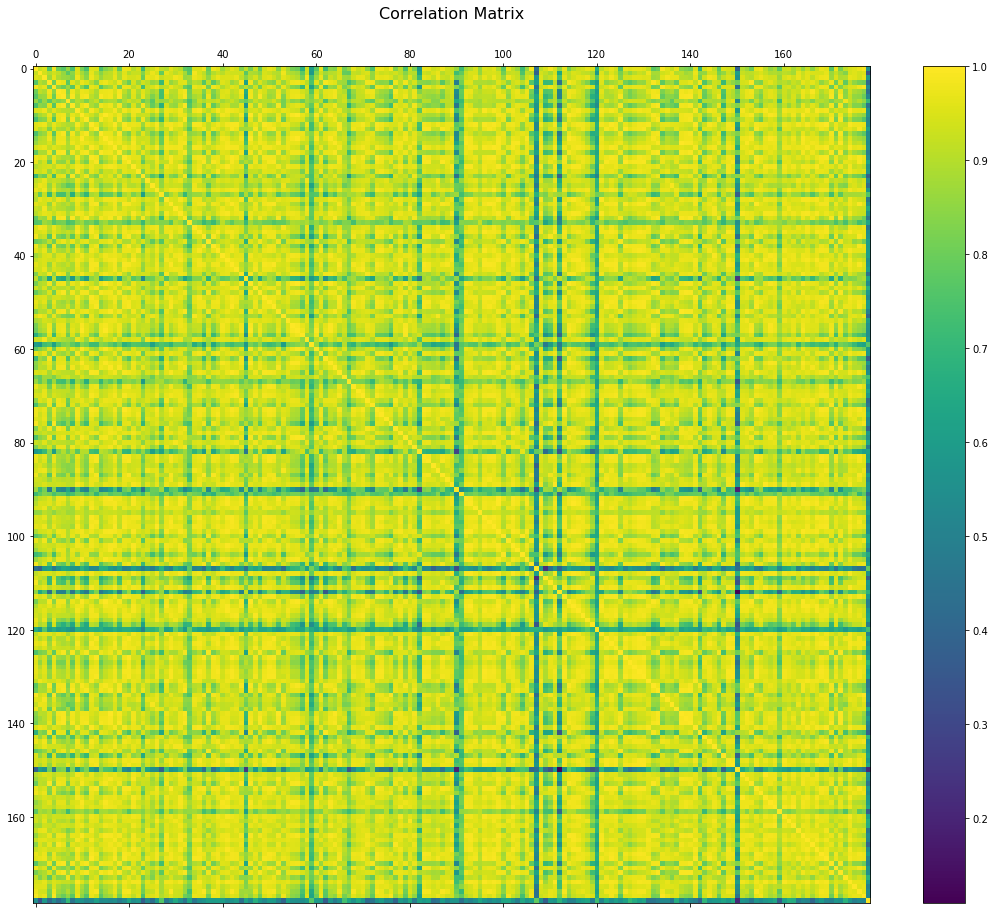

In [59]:
f = plt.figure(figsize=(19, 15))
plt.matshow(pivoted_GDP_df.corr(), fignum=f.number)
cb = plt.colorbar()
cb.ax.tick_params()
plt.title('Correlation Matrix', fontsize=16);

We then try to clusterize this correlation matrix in order to find countries whose GDP are correlated:

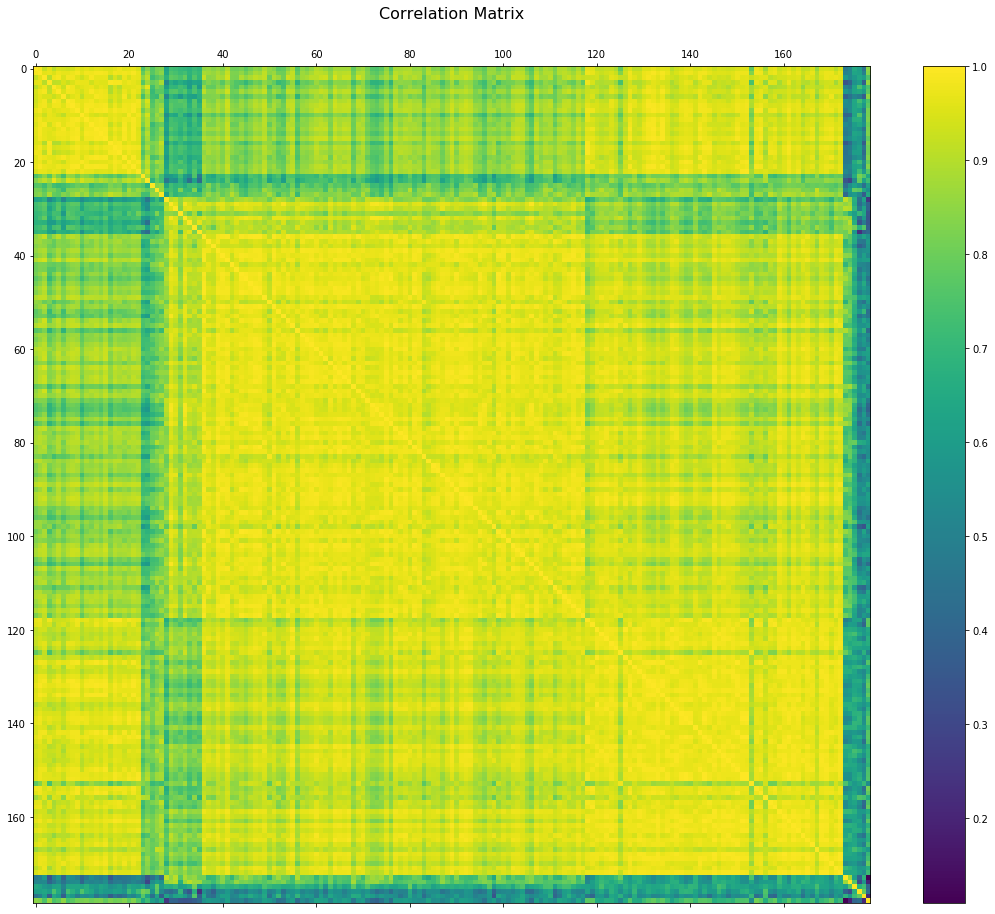

In [60]:
corr = pivoted_GDP_df.corr().values
pdist = spc.distance.pdist(corr)   # vector of ('55' choose 2) pairwise distances
linkage = spc.linkage(pdist, method='complete')
ind = spc.fcluster(linkage, 0.32*pdist.max(), 'distance')
columns = [pivoted_GDP_df.columns.tolist()[i] for i in list((np.argsort(ind)))]
clusterised_df = pivoted_GDP_df.reindex(columns, axis=1)

f = plt.figure(figsize=(19, 15))
plt.matshow(clusterised_df.corr(), fignum=f.number)
cb = plt.colorbar()
cb.ax.tick_params()
plt.title('Correlation Matrix', fontsize=16);

We have found regions in which the GDP is highly correlated and between which the correlation coefficent is lower. We could refine the big clusters by iterating this method.

**Interpretation:** The correlation matrix of GDP contains lots of values that are very closed to one. This means that **GDP in two different countries have a trend to evolve the same way**. Therefore, we can say that the world countries have **strong enough trading relations** to make the GDP evolve the same way. The fact that we have found some **main clusters** could be interpreted as regions in which the **trading relations are more important**.

#### 2.D. Economic classification of countries <a name="2D"></a>
Below, we plot the distribution of GDP over the world for the last decades:

In [61]:
plot = uni_df[['Area','Year']]
plot["Value"] = uni_df["(GDP, million $)"]
for year in range(1980, 2015, 5):
    display(year, visualise_world_data_folium(plot, year, True))

1980

1985

1990

1995

2000

2005

2010

The countries with high **GDP** indeed correpond to the most **developped countries**. The **trends we can observe** from those plots look **very significant** (USSR dissolution, China economic growth, ...)

### 3. Descriptive data analysis  <a name="3"></a>

3. 

    1. [Production and consumption of food from a time-space geography point of view](#3A)
        
        1. [Net food exporters or importers](#3Aa)
        
        2. [Evolution over the last few decades](#3Ab)

    2. [Food self-sufficiency](#3B)

    3. [Analysis of food production and trade with GDP](#3C)
        
        1. [Correlation between production features and GDP](#3Ca)
        
        2. [Correlation between food trade features and GDP](#3Cb)
        
        3. [Machine learning model](#3Cc)  

    4. [Food prices stability and agricultural features](#3D)  
  

#### 3.A. Production and consumption of food from a time-space geography point of view <a name="3A"></a>

For the next milestone, this part will be put to the end of the file and conducted for **specific agricultural features** (e.g. trade of crop most highly correlated to GDP) after the **most important ones** have been **identified**.

#### 3.B. Food self-sufficiency <a name="3B"></a>
We also plan for next milestone to **analyse in more details** the correlation between **food self-sufficiency** and **economic success**.

In [62]:
uni_df[('food self-sufficiency','%')].corr(method='pearson', other =  uni_df['(Consumer price indices, %)'])

0.036316065740648606

In [63]:
uni_df[('food self-sufficiency','%')].corr(method='pearson', other =  uni_df["(GDP, million $)"])

0.08978351936674142

#### 3.C. Analysis of food production and trade with GDP <a name="3C"></a>

##### 3.C.a. Food production and GDP <a name="3Ca"></a>

Out of the crops and the livestock produced, we will **focus on the top 20 crops** as well as **top 20 livestock produced globally** to be able to have a **model with a reasonable amount of features**. 

In [64]:
#Choose the top 20 crops produced in the world for the first model
crop_production_df= uni_df.filter(like='Crops Production tonnes') 
crop_production_df = crop_production_df.sum(axis=0).sort_values(ascending=False)
crop_production_list = crop_production_df.index.tolist()[:20]
crop_production_list.insert(0,'(GDP, million $)')
crop_production_list
#Take the top 20 crops and the columns of our uni_df which contain their production
maincrops_df = uni_df[crop_production_list]

#Livestock
livestock_production_df= uni_df.filter(like='Livestock production') 
livestock_production_df = livestock_production_df.sum(axis=0).sort_values(ascending=False)
livestock_production_list = livestock_production_df.index.tolist()[:20]
livestock_production_list.insert(0,'(GDP, million $)')
livestock_production_list
#Take the top 20 crops and the columns of our uni_df which contain their production
mainlivestock_df = uni_df[livestock_production_list]

top_production_list = crop_production_list +livestock_production_list[1:]

top_production_df = uni_df[top_production_list]
top_production_df.head(5)

(GDP, million $)  Cereals (Rice Milled Eqv) Crops Production tonnes  \
0       1748.886597                                          3390122.0   
1       1831.108982                                          3202450.0   
2       1595.555482                                          3816800.0   
3       1733.333275                                          4130140.0   
4       2155.555500                                          4211140.0   

   Sugar cane Crops Production tonnes  \
0                             55000.0   
1                             50000.0   
2                             35000.0   
3                             58000.0   
4                             51600.0   

   Vegetables&Melons, Total Crops Production tonnes  \
0                                          482000.0   
1                                          558000.0   
2                                          500000.0   
3                                          515000.0   
4                                          518000.0   

   Roots and Tubers,Total Crops Production tonnes  \
0                                        144000.0   
1                                        167000.0   
2                                        158000.0   
3                                        165000.0   
4                                        182000.0   

   Maize Crops Production tonnes  Wheat Crops Production tonnes  \
0                       667000.0                      2081000.0   
1                       670000.0                      1915000.0   
2                       720000.0                      2450000.0   
3                       760000.0                      2700000.0   
4                       770000.0                      2750000.0   

   Rice, paddy Crops Production tonnes  \
0                             366000.0   
1                             350000.0   
2                             400000.0   
3                             420000.0   
4                             420000.0   

   Fruit excl Melons,Total Crops Production tonnes  \
0                                         794600.0   
1                                         634800.0   
2                                         781400.0   
3                                         822500.0   
4                                         847500.0   

   Potatoes Crops Production tonnes  ...  Camels Livestock production Head  \
0                          144000.0  ...                          300000.0   
1                          167000.0  ...                          300000.0   
2                          158000.0  ...                          300000.0   
3                          165000.0  ...                          300000.0   
4                          182000.0  ...                          300000.0   

   Poultry Birds Livestock production 1000 Head  \
0                                        6000.0   
1                                        6000.0   
2                                        6000.0   
3                                        6100.0   
4                                        6100.0   

   Mules Livestock production Head  Chickens Livestock production 1000 Head  \
0                          35000.0                                   6000.0   
1                          35000.0                                   6000.0   
2                          31000.0                                   6000.0   
3                          26500.0                                   6100.0   
4                          26500.0                                   6100.0   

   Camelids, other Livestock production Head  \
0                                        0.0   
1                                        0.0   
2                                        0.0   
3                                        0.0   
4                                        0.0   

   Animals live nes Livestock production Head  \
0                                         0.0   
1                                         

In [65]:
#Checking correlations of main crops between each other and with GDP
top_production_correlation_matrix = round (top_production_df.corr(method='pearson'),3)
top_production_correlation_matrix['(GDP, million $)'].sort_values(ascending = False)

(GDP, million $)                                         1.000
Maize Crops Production tonnes                            0.779
Turkeys Livestock production 1000 Head                   0.705
Soybeans Crops Production tonnes                         0.658
Cereals (Rice Milled Eqv) Crops Production tonnes        0.654
Chickens Livestock production 1000 Head                  0.578
Poultry Birds Livestock production 1000 Head             0.568
Tomatoes Crops Production tonnes                         0.550
Citrus Fruit,Total Crops Production tonnes               0.535
Wheat Crops Production tonnes                            0.508
Fruit excl Melons,Total Crops Production tonnes          0.494
Grapes Crops Production tonnes                           0.452
Horses Livestock production Head                         0.432
Sorghum Crops Production tonnes                          0.410
Sugar beet Crops Production tonnes                       0.395
Vegetables&Melons, Total Crops Production tonnes       

Because "Cereals (Rice Milled Eqv) Crops Production tonnes" has such a high correlation with a lot of other features, it is **probably an aggregate of them** (eg over 90% with wheat).

We would know like to look at some **relationships between these measures and the GDP**:

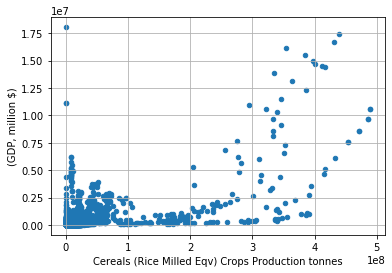

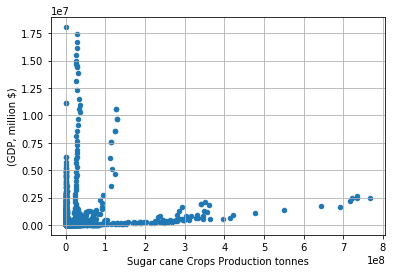

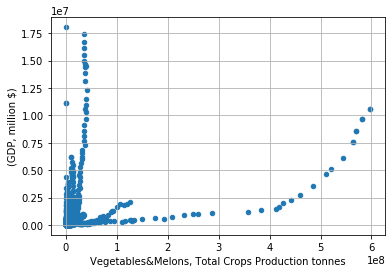

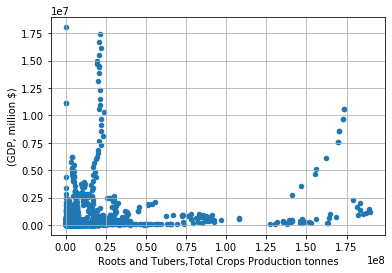

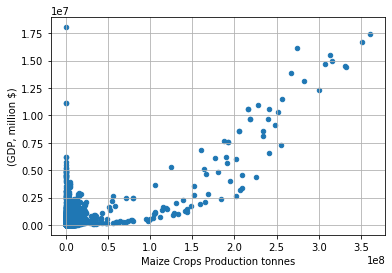

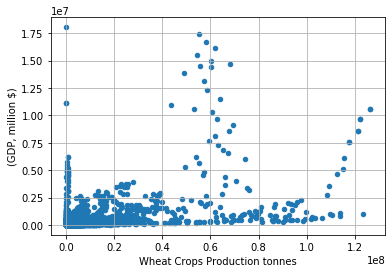

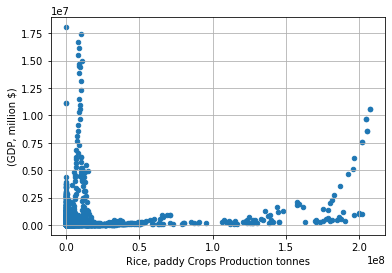

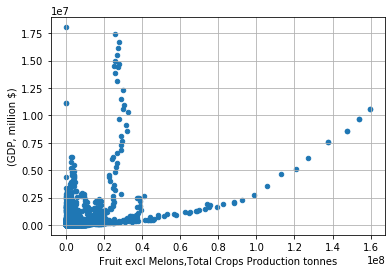

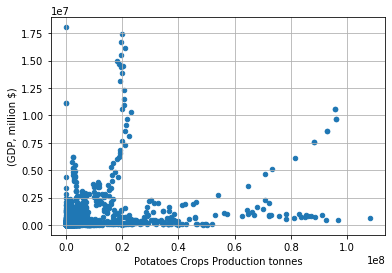

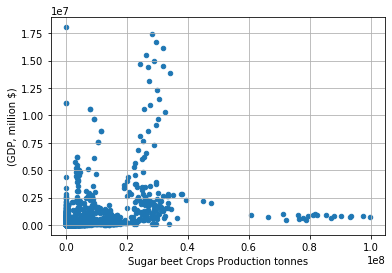

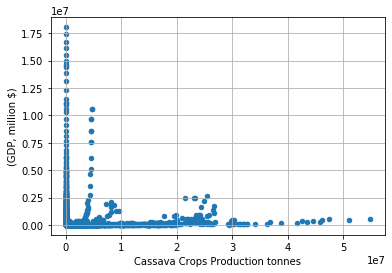

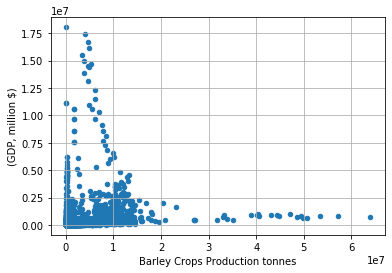

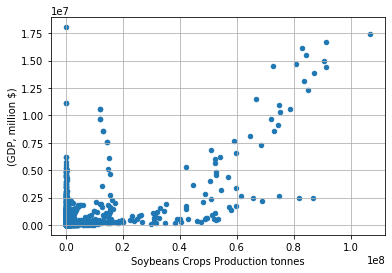

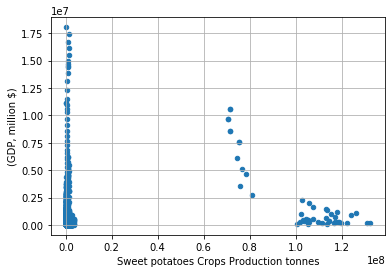

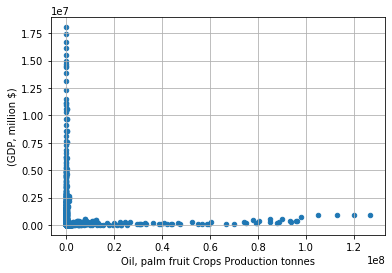

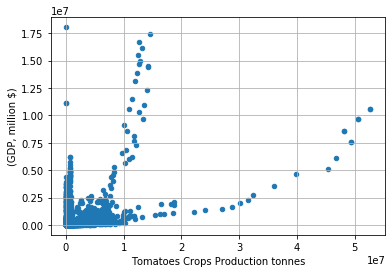

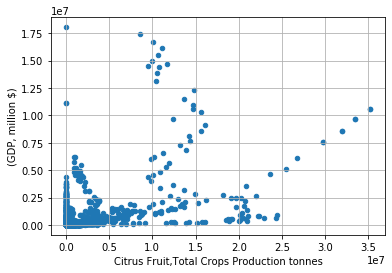

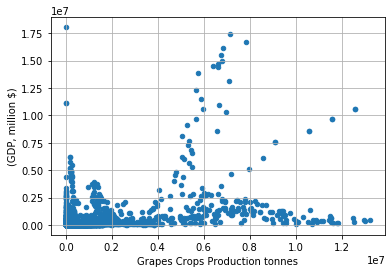

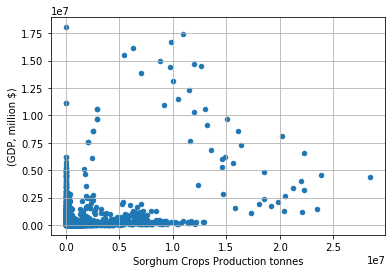

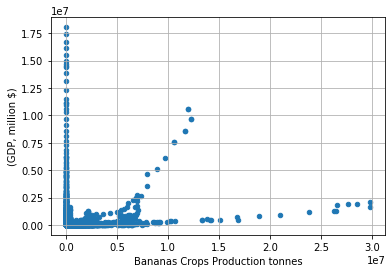

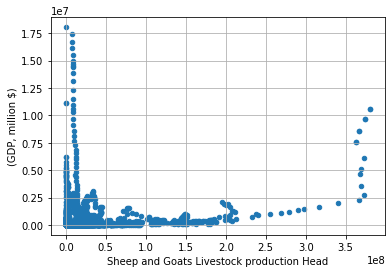

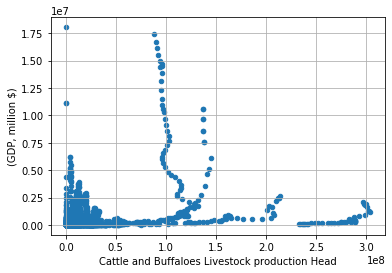

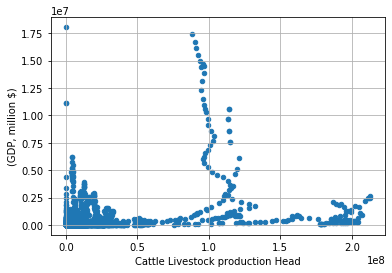

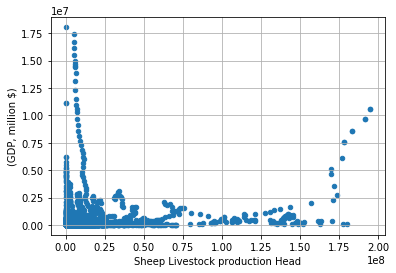

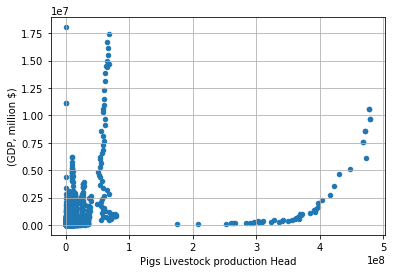

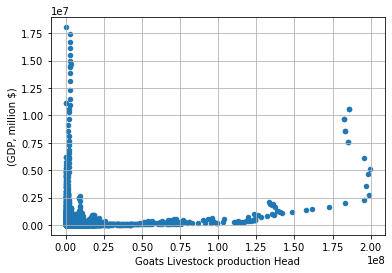

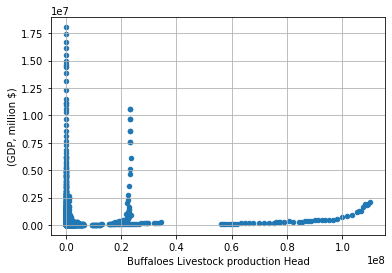

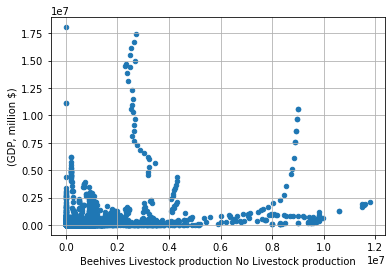

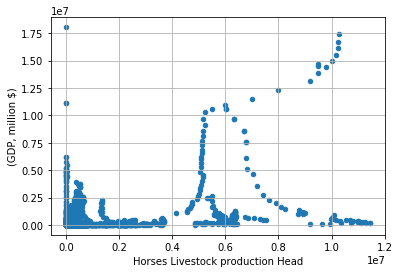

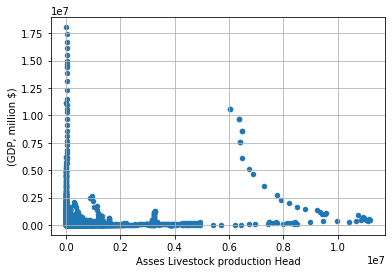

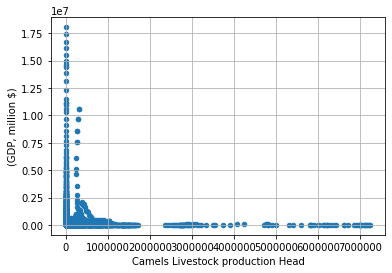

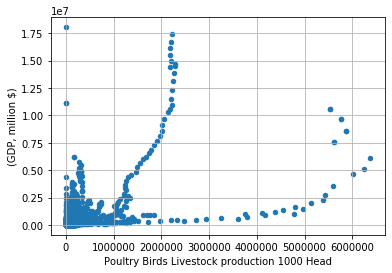

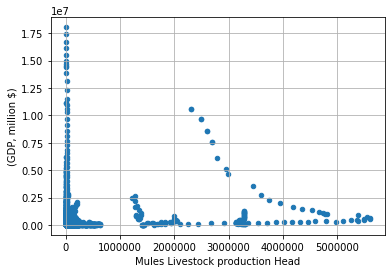

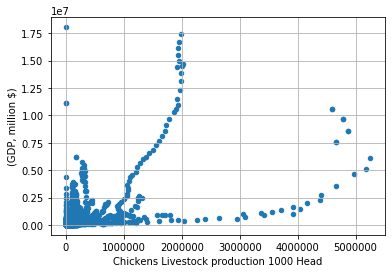

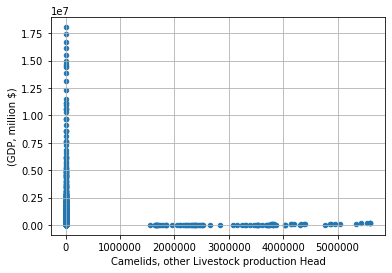

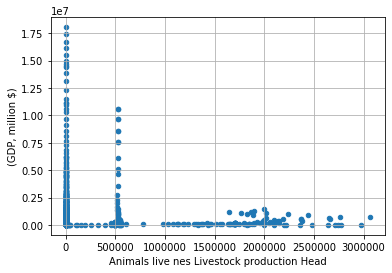

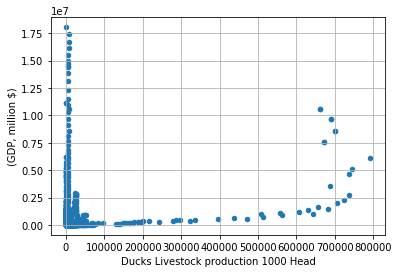

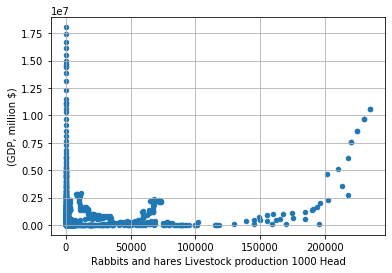

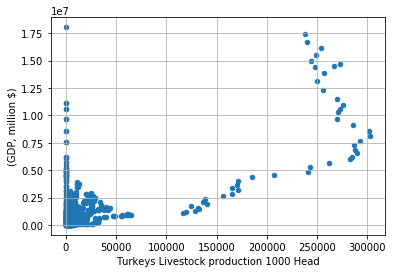

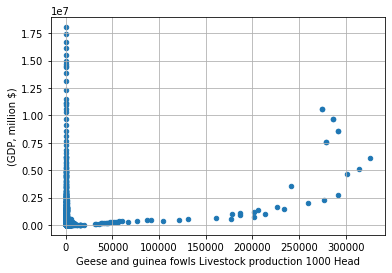

In [66]:
#Looking at some relationships
for item in list(top_production_df.columns)[1:]:
    top_production_df.plot(kind='scatter', x=item, y='(GDP, million $)', grid=True)


We can quite clearly see that the production of many of the most popular crops can well be related to GDP.

##### 3.C.b. Trade and GDP <a name="3Cb"></a>

Let's see if the same can be said about the most exported/imported goods.

In [67]:
#Choose the top 20 most exported items by mass
top_exports_df= uni_df.filter(like='export quantities tonnes')
top_exports_df = top_exports_df.sum(axis=0).sort_values(ascending=False)
top_exports_list =top_exports_df.index.tolist()[:20]
top_exports_list

#Take the top 20 exported crops and the columns of our uni_df which contain their production
top_exports_list.insert(0,'(GDP, million $)')
top_exports_df = uni_df[top_exports_list]


#Choose the top 20 most imported items by mass
top_imports_df= uni_df.filter(like='import quantities tonnes')
top_imports_df = top_imports_df.sum(axis=0).sort_values(ascending=False)

top_imports_list =top_imports_df.index.tolist()[:20]
top_imports_list

#Take the top 20 imported items and the columns of our uni_df which contain their production
top_imports_list.insert(0,'(GDP, million $)')
top_imports_df = uni_df[top_imports_list]

#Create a joined list
top_traded_list = top_exports_list +top_imports_list[1:]

In [68]:
top_traded_df = uni_df[top_traded_list]
top_traded_df.sample(5)

(GDP, million $)  Cereals Food export quantities tonnes  \
2529        847.918929                                    0.0   
5600       4766.919343                                    0.0   
3411        111.033263                                    0.0   
1839       8194.991104                                   11.0   
3568        408.246508                                    0.0   

      Wheat+Flour,Wheat Equivalent Food export quantities tonnes  \
2529                                                0.0            
5600                                                0.0            
3411                                                0.0            
1839                                               11.0            
3568                                                0.0            

      Wheat Food export quantities tonnes  \
2529                                  0.0   
5600                                  0.0   
3411                                  0.0   
1839                                  0.0   
3568                                  0.0   

      Maize Food export quantities tonnes  \
2529                                  0.0   
5600                                  0.0   
3411                                  0.0   
1839                                  0.0   
3568                                  0.0   

      Fodder & Feeding stuff Food export quantities tonnes  \
2529                                                0.0      
5600                                            20434.0      
3411                                                0.0      
1839                                              689.0      
3568                                                0.0      

      Milk Equivalent Food export quantities tonnes  \
2529                                          684.0   
5600                                            0.0   
3411                                            0.0   
1839                                          276.0   
3568                                            0.0   

      Oilseeds Food export quantities tonnes  \
2529                                   768.0   
5600                                 10283.0   
3411                                     0.0   
1839                                     4.0   
3568                                  1693.0   

      Sugar and Honey Food export quantities tonnes  \
2529                                         1500.0   
5600                                        14766.0   
3411                                            0.0   
1839                                           85.0   
3568                                            0.0   

      Oilseed Cake Meal Food export quantities tonnes  ...  \
2529                                              0.0  ...   
5600                                          20434.0  ...   
3411                                              0.0  ...   
1839                                              0.0  ...   
3568                                              0.0  ...   

      Animal Vegetable Oil Food import quantities tonnes  \
2529                                            91365.0    
5600                                            91390.0    
3411                                               91.0    
1839                                             7611.0    
3568                                             4978.0    

      Sugar,Total (Raw Equiv.) Food import quantities tonnes  \
2529                                           161300.0        
5600                                           185334.0        
3411                                             3628.0        
1839                                             6072.0        
3568                                             3833.0        

      Cake, soybeans Food import quantities tonnes  \
2529                                           0.0   
5600                                        4200.0   
3411                                           0.0   
1839 

We now check the **correlations** of main traded goods **with GDP**:

In [69]:
top_traded_correlation_matrix = round (top_traded_df.corr(method='pearson'),3)
top_traded_correlation_matrix['(GDP, million $)'].sort_values(ascending = False)

(GDP, million $)                                                        1.000
Oilseeds Food export quantities tonnes                                  0.634
Soybeans Food export quantities tonnes                                  0.615
Maize Food export quantities tonnes                                     0.612
Cereals Food export quantities tonnes                                   0.608
Fodder & Feeding stuff Food export quantities tonnes                    0.557
Sugar and Honey Food import quantities tonnes                           0.539
Wheat+Flour,Wheat Equivalent Food export quantities tonnes              0.533
Wheat Food export quantities tonnes                                     0.530
Animal Vegetable Oil Food import quantities tonnes                      0.502
Fixed Vegetable Oils Food import quantities tonnes                      0.494
Beverages Food import quantities tonnes                                 0.463
Sugar,Total (Raw Equiv.) Food import quantities tonnes          

It seems that the highest correlations can be found from **exports of meat as well** as **feeding stuff**. 

We would know like to look at some **relationships between these measures and the GDP**:

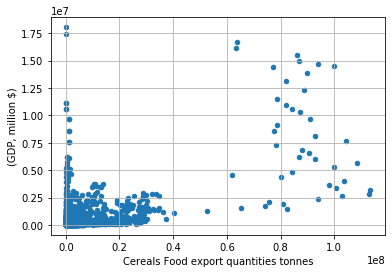

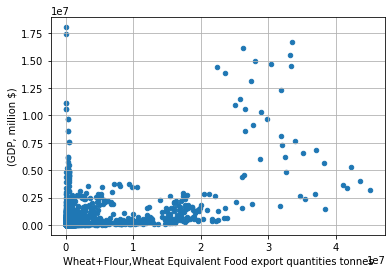

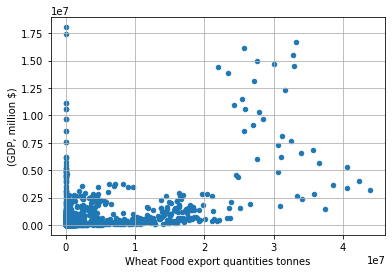

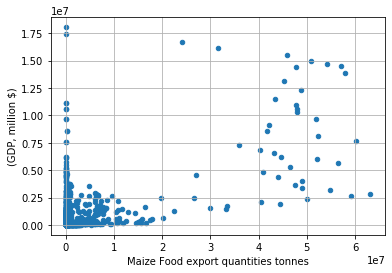

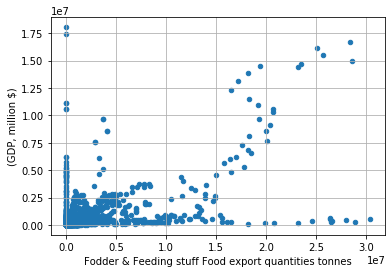

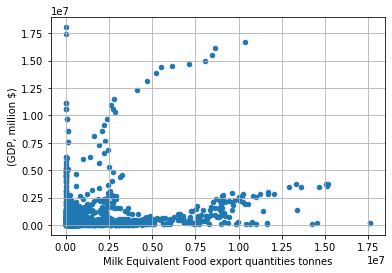

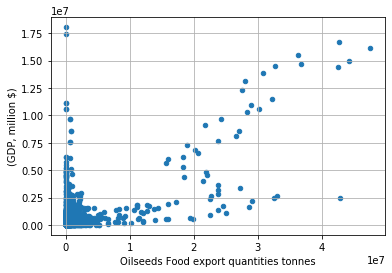

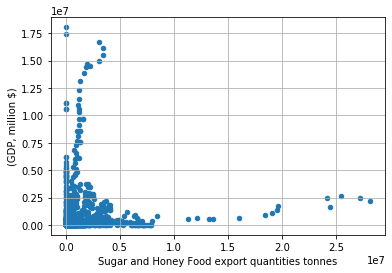

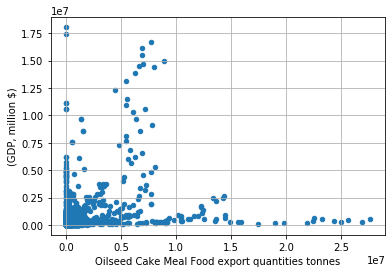

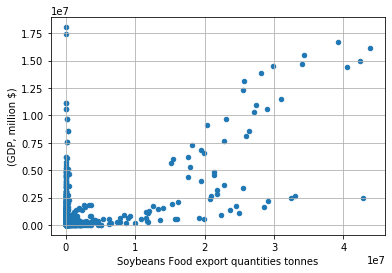

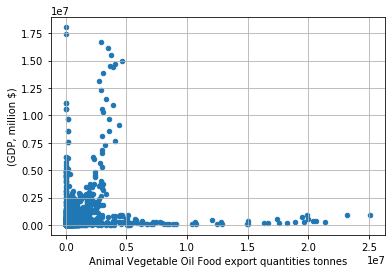

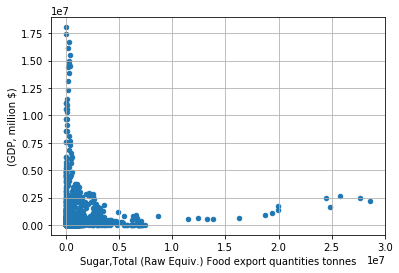

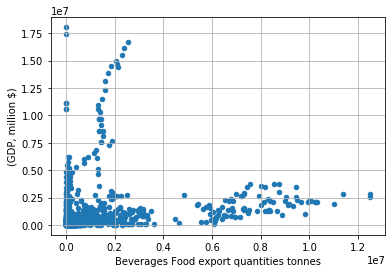

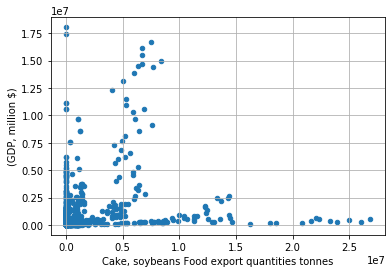

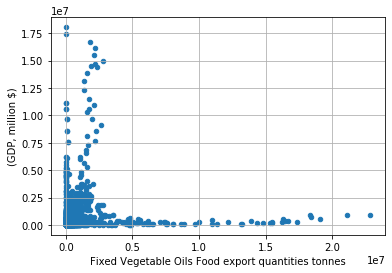

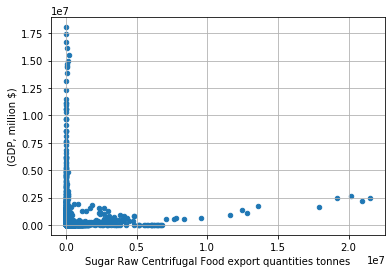

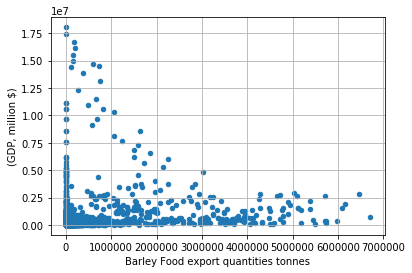

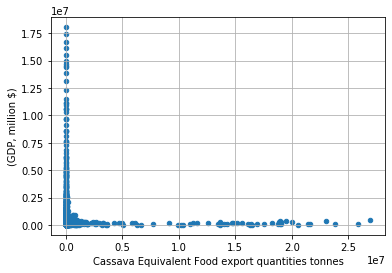

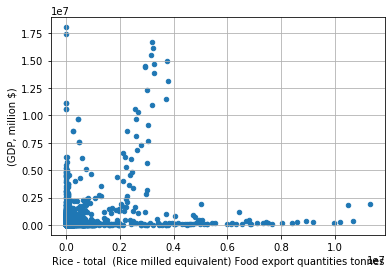

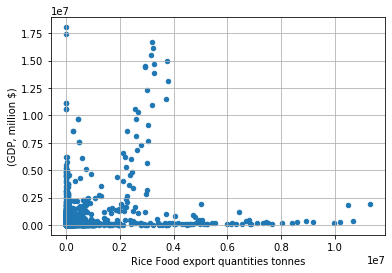

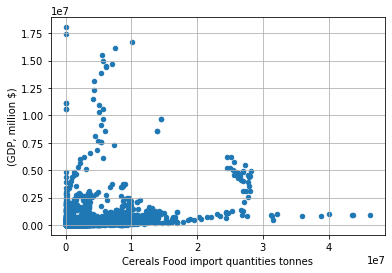

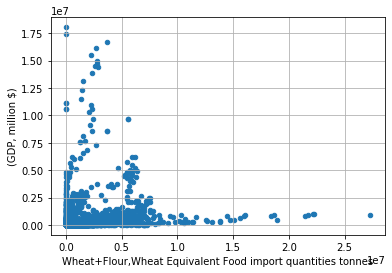

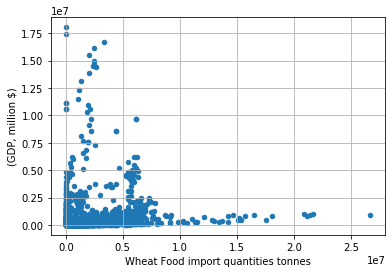

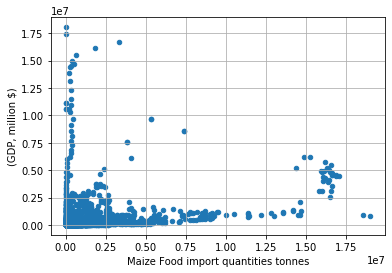

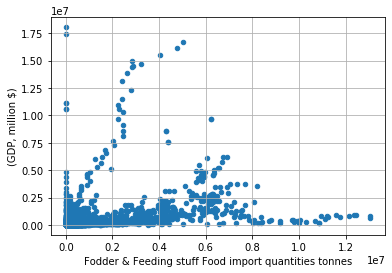

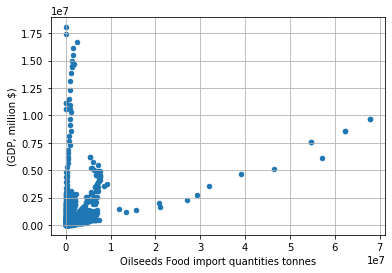

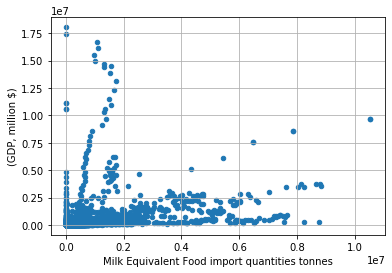

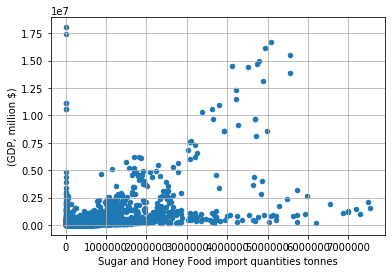

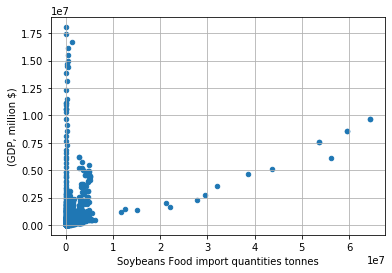

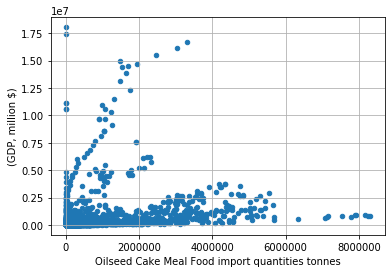

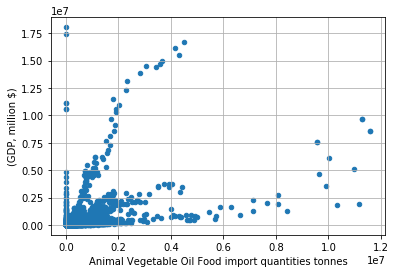

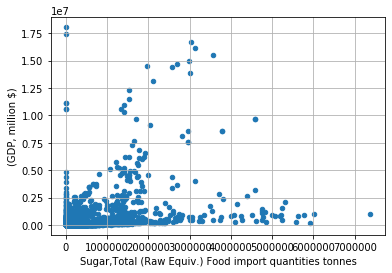

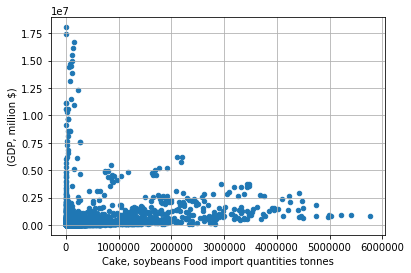

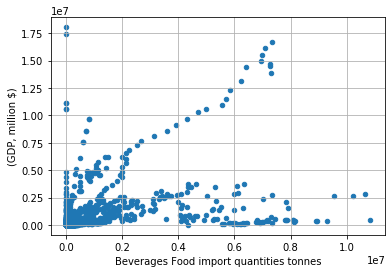

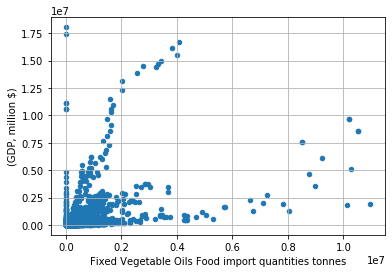

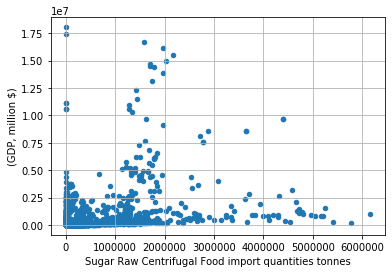

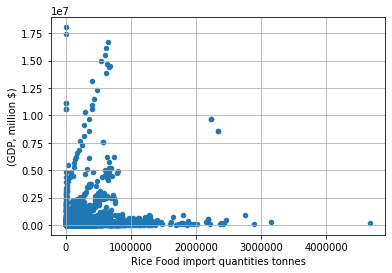

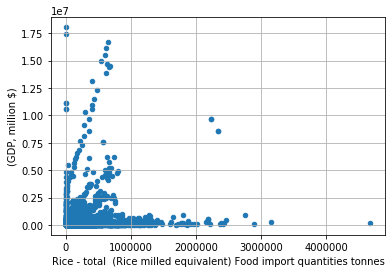

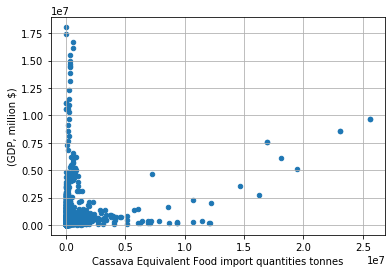

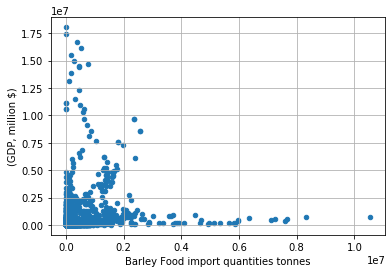

In [70]:
for item in list(top_traded_df.columns)[1:]:
    top_traded_df.plot(kind='scatter', x=item, y='(GDP, million $)', grid=True)

##### 3.C.c. Machine learning model <a name="3Cc"></a>

3. 

    3. 
        
        3. 
        
            1. [Model - based on trade](#3Cci)  
        
            2. [Model - based on production](#3Ccii) 

###### 3.C.c.i. Model - based on production <a name="3Cci"></a>

First, we only create a model using **only the production data**. Afterwards, we use the data on exports, imports. 

#### Standardization, scaling


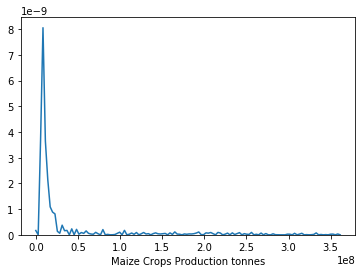

In [71]:
_ = sns.distplot(top_production_df["Maize Crops Production tonnes"], rug=False, hist=False)

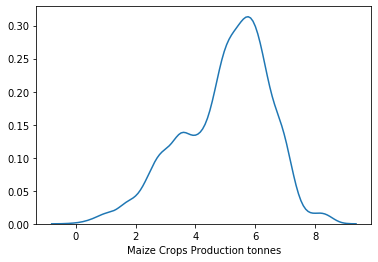

In [72]:
_ = sns.distplot(np.log10(top_production_df["Maize Crops Production tonnes"]), rug=False, hist=False)

We notice that the production of goods, just as the GDP, has a more "normal looking" distribution when we use the logscale. We will thus create a new uniformed dataframe, with applying the logarithm to all values.

In [73]:
#Using 1+x so as to keep 0 values to 0.
def log(x):
    return np.log10(1+x)

In [74]:
#create a new dataframe with log values, so that we have normal distributions for later analysis
uni_df_log = uni_df.copy()
uni_df_log.iloc[:,2:] = uni_df_log.iloc[:,2:].apply(lambda x : log(x))

In [75]:
top_production_log_df = uni_df_log[top_production_list]
top_production_log_df.sample(5)

(GDP, million $)  Cereals (Rice Milled Eqv) Crops Production tonnes  \
4861          3.333928                                           6.145596   
3864          4.639486                                           7.258011   
7176          3.330483                                           0.000000   
4415          4.190429                                           2.120574   
3700          3.687434                                           5.887122   

      Sugar cane Crops Production tonnes  \
4861                            6.138281   
3864                            7.147196   
7176                            0.000000   
4415                            0.000000   
3700                            6.553907   

      Vegetables&Melons, Total Crops Production tonnes  \
4861                                          5.477241   
3864                                          6.328551   
7176                                          0.000000   
4415                                          4.463938   
3700                                          5.592619   

      Roots and Tubers,Total Crops Production tonnes  \
4861                                        6.336978   
3864                                        7.175198   
7176                                        0.000000   
4415                                        2.158362   
3700                                        4.489044   

      Maize Crops Production tonnes  Wheat Crops Production tonnes  \
4861                       5.059359                       2.624282   
3864                       6.410295                       0.000000   
7176                       0.000000                       0.000000   
4415                       1.000000                       0.000000   
3700                       5.818073                       2.975432   

      Rice, paddy Crops Production tonnes  \
4861                             6.283754   
3864                             7.367374   
7176                             0.000000   
4415                             0.000000   
3700                             4.603523   

      Fruit excl Melons,Total Crops Production tonnes  \
4861                                         5.861066   
3864                                         6.472062   
7176                                         0.000000   
4415                                         3.023664   
3700                                         6.167309   

      Potatoes Crops Production tonnes  ...  Camels Livestock production Head  \
4861                          5.257609  ...                          0.000000   
3864                          5.187524  ...                          0.000000   
7176                          0.000000  ...                          0.000000   
4415                          2.158362  ...                          3.699057   
3700                          4.280738  ...                          0.000000   

      Poultry Birds Livestock production 1000 Head  \
4861                                      4.306446   
3864                                      5.070278   
7176                                      0.000000   
4415                                      3.752970   
3700                                      4.133571   

      Mules Livestock production Head  \
4861                          0.00000   
3864                          0.00000   
7176                          0.00000   
4415                          0.00000   
3700                          4.84074   

      Chickens Livestock production 1000 Head  \
4861                                 4.146159   
3864                                 5.010228   
7176                                 0.000000   
4415                                 3.752970   
3700                                 4.133571   

      Camelids, other Livestock production Head  \
4861                                        0.0   
3864                                        0.0   
7176                                        0.0   

In [76]:
#We then normalize the data, so as to have comparable ranges. We use the dataframe of log values.

top_production_values = top_production_log_df.values
standard_scaler = preprocessing.StandardScaler()
top_production_stand_values =standard_scaler.fit_transform(top_production_values)
top_production_stand = pd.DataFrame(top_production_stand_values, columns=top_production_log_df.columns)
top_production_stand.sample(5)

(GDP, million $)  Cereals (Rice Milled Eqv) Crops Production tonnes  \
5798          0.415761                                          -1.730871   
3089         -0.019914                                          -1.730871   
6928         -0.487272                                           0.301741   
3795          0.097356                                          -1.730871   
631           0.021576                                          -1.730871   

      Sugar cane Crops Production tonnes  \
5798                           -0.900328   
3089                            0.236408   
6928                            0.512634   
3795                           -0.900328   
631                            -0.900328   

      Vegetables&Melons, Total Crops Production tonnes  \
5798                                         -2.255956   
3089                                         -0.405140   
6928                                          0.234194   
3795                                         -0.556347   
631                                          -0.271380   

      Roots and Tubers,Total Crops Production tonnes  \
5798                                       -2.155906   
3089                                       -0.299183   
6928                                        0.734803   
3795                                       -0.326290   
631                                        -1.586678   

      Maize Crops Production tonnes  Wheat Crops Production tonnes  \
5798                      -1.410905                      -0.986939   
3089                      -1.410905                      -0.986939   
6928                       0.534578                       0.448816   
3795                      -1.410905                      -0.986939   
631                       -1.410905                      -0.986939   

      Rice, paddy Crops Production tonnes  \
5798                            -1.019020   
3089                            -1.019020   
6928                             0.519333   
3795                            -1.019020   
631                             -1.019020   

      Fruit excl Melons,Total Crops Production tonnes  \
5798                                        -2.345133   
3089                                        -0.290337   
6928                                         0.896865   
3795                                        -1.736819   
631                                         -0.202916   

      Potatoes Crops Production tonnes  ...  Camels Livestock production Head  \
5798                         -1.297216  ...                         -0.481401   
3089                         -0.227739  ...                         -0.481401   
6928                          0.808732  ...                         -0.481401   
3795                          0.206097  ...                         -0.481401   
631                          -0.829507  ...                          1.008024   

      Poultry Birds Livestock production 1000 Head  \
5798                                     -2.155140   
3089                                     -0.595311   
6928                                     -0.163800   
3795                                     -0.719862   
631                                      -0.366328   

      Mules Livestock production Head  \
5798                        -0.726811   
3089                        -0.726811   
6928                        -0.726811   
3795                        -0.726811   
631                         -0.726811   

      Chickens Livestock production 1000 Head  \
5798                                -2.157192   
3089                                -0.617247   
6928                                -0.156207   
3795                                -0.711979   
631                                 -0.355998   

      Camelids, other Livestock production Head  \
5798                                  -0.099386   
3089                                  -0.099386   
6928                                  -0.099386   

In [77]:
train_set, test_set = train_test_split(top_production_stand.values, test_size = 0.2, random_state = 1)

X_train_set = train_set[:,1:]
Y_train_set = train_set[:,0]

X_test_set = test_set[:,1:]
Y_test_set = test_set[:,0]

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:45<00:00, 21.83it/s]


The best value obtained is for alpha equal to 0.06 with a MSE of 0.32763200811215537


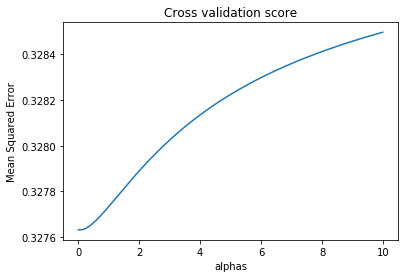

In [78]:
number_of_folds = 5
scores = []
list_of_alpha = [i for i in np.arange(0,10,0.01)]
for alpha in tqdm(list_of_alpha):
    clf = Ridge(alpha = alpha)
    score = cross_val_score(clf, X_train_set, Y_train_set, cv=number_of_folds, scoring = 'neg_mean_squared_error')
    scores.append([alpha, score.mean()])
a=np.array(scores)
best_alpha = a[np.where(a==np.amax(a[:,1]))[0]][0,0]
print("The best value obtained is for alpha equal to " + str(best_alpha) + " with a MSE of "+ str(-a[np.where(a==np.amax(a[:,1]))[0]][0,1]))
alphas = [elt[0] for elt in scores]
MSE = [-elt[1] for elt in scores]
sns.lineplot(alphas, MSE)
_ = plt.title("Cross validation score")
_ = plt.ylabel("Mean Squared Error")
_ = plt.xlabel("alphas")

In [79]:
# We build our model with the chosen alpha.
model_top_production = Ridge(alpha=best_alpha)
model_top_production.fit(X_train_set, Y_train_set)

Ridge(alpha=0.06, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [80]:
weights_top_production = pd.DataFrame([model_top_production.coef_], columns=top_production_df.columns[1:])
weights_top_production = weights_top_production.sort_values(by=0, axis=1, ascending=False)                                  
weights_top_production

Poultry Birds Livestock production 1000 Head  \
0                                      1.486112   

   Cattle and Buffaloes Livestock production Head  \
0                                          0.6384   

   Potatoes Crops Production tonnes  Tomatoes Crops Production tonnes  \
0                           0.22552                          0.187854   

   Sheep Livestock production Head  Sugar beet Crops Production tonnes  \
0                         0.145461                             0.13441   

   Turkeys Livestock production 1000 Head  \
0                                0.114564   

   Oil, palm fruit Crops Production tonnes  Wheat Crops Production tonnes  \
0                                 0.109679                       0.103595   

   Horses Livestock production Head  ...  \
0                          0.094869  ...   

   Vegetables&Melons, Total Crops Production tonnes  \
0                                         -0.053963   

   Rice, paddy Crops Production tonnes  \
0                            -0.085615   

   Geese and guinea fowls Livestock production 1000 Head  \
0                                          -0.098977       

   Pigs Livestock production Head  Asses Livestock production Head  \
0                       -0.117822                        -0.179584   

   Sheep and Goats Livestock production Head  \
0                                  -0.255719   

   Fruit excl Melons,Total Crops Production tonnes  \
0                                        -0.328864   

   Roots and Tubers,Total Crops Production tonnes  \
0                                       -0.346439   

   Cattle Livestock production Head  Chickens Livestock production 1000 Head  
0                          -0.54638                                -0.769241  

[1 rows x 40 columns]

In [81]:
model_top_production.score(X_train_set, Y_train_set)

0.6696735614504745

Results are so far middling, but it also need cleaning since there's some aggregate values (e.g. including "total" in their name, that need to be removed). We will continue working on this for next milestone.

###### 3.C.c.ii. Model - based on trade <a name="3Ccii"></a>

In [82]:
#Use dataframe with log values
top_traded_log_df = uni_df_log[top_traded_list]

In [83]:
#We then normalize the data, so as to have comparable ranges. We use the dataframe of log values.

top_traded_values = top_traded_log_df.values
standard_scaler = preprocessing.StandardScaler()
top_traded_stand_values =standard_scaler.fit_transform(top_traded_values)
top_traded_stand = pd.DataFrame(top_production_stand_values, columns=top_traded_log_df.columns)
top_traded_stand.sample(5)

(GDP, million $)  Cereals Food export quantities tonnes  \
5993         -0.249097                               0.381123   
2191          0.515706                               0.756432   
6777          1.015646                               0.840001   
7484         -0.864762                              -1.730871   
746           0.298567                               0.833903   

      Wheat+Flour,Wheat Equivalent Food export quantities tonnes  \
5993                                           1.202879            
2191                                          -0.900328            
6777                                          -0.900328            
7484                                          -0.900328            
746                                           -0.900328            

      Wheat Food export quantities tonnes  \
5993                            -0.019528   
2191                             0.499506   
6777                             1.111315   
7484                            -2.255956   
746                              0.664073   

      Maize Food export quantities tonnes  \
5993                             0.133570   
2191                             0.558272   
6777                             0.681882   
7484                            -2.155906   
746                              1.043551   

      Fodder & Feeding stuff Food export quantities tonnes  \
5993                                           0.621130      
2191                                           1.083005      
6777                                           0.584699      
7484                                          -1.410905      
746                                           -0.241395      

      Milk Equivalent Food export quantities tonnes  \
5993                                      -0.986939   
2191                                       1.112150   
6777                                       0.421340   
7484                                      -0.986939   
746                                        0.890469   

      Oilseeds Food export quantities tonnes  \
5993                                0.894572   
2191                               -1.019020   
6777                                1.502388   
7484                               -1.019020   
746                                -1.019020   

      Sugar and Honey Food export quantities tonnes  \
5993                                       0.335640   
2191                                       0.476759   
6777                                       0.710340   
7484                                      -2.345133   
746                                        0.421463   

      Oilseed Cake Meal Food export quantities tonnes  ...  \
5993                                         0.299069  ...   
2191                                         0.932901  ...   
6777                                         0.892142  ...   
7484                                        -1.297216  ...   
746                                          1.331633  ...   

      Animal Vegetable Oil Food import quantities tonnes  \
5993                                          -0.481401    
2191                                          -0.481401    
6777                                          -0.481401    
7484                                          -0.481401    
746                                           -0.481401    

      Sugar,Total (Raw Equiv.) Food import quantities tonnes  \
5993                                           0.180784        
2191                                           0.400615        
6777                                           0.808166        
7484                                          -2.155140        
746                                            0.686845        

      Cake, soybeans Food import quantities tonnes  \
5993                                      1.553474   
2191                                     -0.726811   
6777                                      0.341206   
7484 

In [84]:
train_set, test_set = train_test_split(top_traded_stand.values, test_size = 0.2, random_state = 1)

X_train_set = train_set[:,1:]
Y_train_set = train_set[:,0]

X_test_set = test_set[:,1:]
Y_test_set = test_set[:,0]

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:44<00:00, 22.65it/s]


The best value obtained is for alpha equal to 0.06 with a MSE of 0.32763200811215537


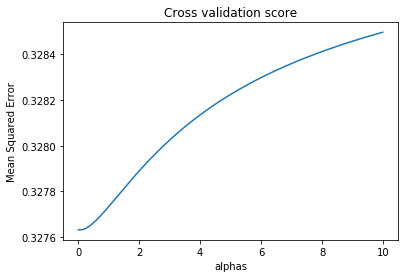

In [85]:
number_of_folds = 5
scores = []
list_of_alpha = [i for i in np.arange(0,10,0.01)]
for alpha in tqdm(list_of_alpha):
    clf = Ridge(alpha = alpha)
    score = cross_val_score(clf, X_train_set, Y_train_set, cv=number_of_folds, scoring = 'neg_mean_squared_error')
    scores.append([alpha, score.mean()])
a=np.array(scores)
best_alpha = a[np.where(a==np.amax(a[:,1]))[0]][0,0]
print("The best value obtained is for alpha equal to " + str(best_alpha) + " with a MSE of "+ str(-a[np.where(a==np.amax(a[:,1]))[0]][0,1]))
alphas = [elt[0] for elt in scores]
MSE = [-elt[1] for elt in scores]
sns.lineplot(alphas, MSE)
_ = plt.title("Cross validation score")
_ = plt.ylabel("Mean Squared Error")
_ = plt.xlabel("alphas")

In [86]:
# We build our model with the chosen alpha.
model_trade = Ridge(alpha=best_alpha)
model_trade.fit(X_train_set, Y_train_set)

Ridge(alpha=0.06, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [87]:
weights_trade = pd.DataFrame([model_trade.coef_], columns=top_traded_stand.columns[1:])
weights_trade = weights_trade.sort_values(by=0, axis=1, ascending=False)                                  
weights_trade

Sugar,Total (Raw Equiv.) Food import quantities tonnes  \
0                                           1.486112        

   Wheat+Flour,Wheat Equivalent Food import quantities tonnes  \
0                                             0.6384            

   Oilseed Cake Meal Food export quantities tonnes  \
0                                          0.22552   

   Sugar Raw Centrifugal Food export quantities tonnes  \
0                                           0.187854     

   Maize Food import quantities tonnes  \
0                             0.145461   

   Soybeans Food export quantities tonnes  \
0                                 0.13441   

   Cassava Equivalent Food import quantities tonnes  \
0                                          0.114564   

   Fixed Vegetable Oils Food export quantities tonnes  \
0                                           0.109679    

   Milk Equivalent Food export quantities tonnes  \
0                                       0.103595   

   Soybeans Food import quantities tonnes  ...  \
0                                0.094869  ...   

   Wheat Food export quantities tonnes  \
0                            -0.053963   

   Oilseeds Food export quantities tonnes  \
0                               -0.085615   

   Barley Food import quantities tonnes  \
0                             -0.098977   

   Fodder & Feeding stuff Food import quantities tonnes  \
0                                          -0.117822      

   Oilseed Cake Meal Food import quantities tonnes  \
0                                        -0.179584   

   Cereals Food import quantities tonnes  \
0                              -0.255719   

   Sugar and Honey Food export quantities tonnes  \
0                                      -0.328864   

   Maize Food export quantities tonnes  Wheat Food import quantities tonnes  \
0                            -0.346439                             -0.54638   

   Beverages Food import quantities tonnes  
0                                -0.769241  

[1 rows x 40 columns]

In [88]:
model_trade.score(X_train_set, Y_train_set)

0.6696735614504745

This models also needs to be cleaned, because the one with lowest weights is actually a part of the one with highest. 

But it seems we can already draw some **conclusions**: **cake, soybeans, as well as oilseed cake meal food and fodder & Feeding stuff** are all used as animal feed. The fact that they're among the **features with the highest weights** clearly indicates that there's **a link between GDP and high amounts of imports of animal feed**. 

#### 3.D. Food prices stability and agricultural features <a name="3D"></a>

In this part, we plan to draw for next milestone a similar analysis with CPI as with GDP in previous section.

### 4. Informed plan for next actions  <a name="4"></a>

With **clean dataframes** we can now really focus on **producing some interesting results**. Our initial idea was to observe the **effects of different crops and food items on the economic growth** of the countries as well as the **differences in self-sufficiency**. Along the exploration of the data, we turned our attention toward prediction models. Training a **Ridge model** on our data will allow us to identify the **agricultural products** that are the **most correlated** with the **economic growth** of countries (predict the GDP based on agricultural features). The second model (prediction of the CPI variation rate) will allow us to identify **products linked with economic stability**.  

The identification of such items would give an **interesting insight toward understanding geopolotical strategies and challenges**. Further insight might be gained by identifying **who** the producers of these "economically strong" crops and animal products are and visualising the **geographical repartition of the most important ressources**. 

Our objectives for the following weeks are:
1. Revise the order of analysis - for instance putting net food exporters and importers at the end of the notebook. 
2. Fine tune our machine learning models by finding satisfying and meaningful ways to normalise the data without introducing bias, by doing a meaningful parameter optimisation and by removing aggregation variables such as "Rice-total".
3. Identify the "strong" agricultural products.
4. Find a clean way to calculate price stability with the given CPI values.
5. Create a model for price stability and correlating it to different agricultural products.
6. Identify the products we want to use for the self-sufficiency calculation.
7. Compute the correlation between price stability and self-sufficiency.
8. Visualise the repartition of the production of "strong" products as well as their trading flow (who buys, who sells).
9. Share our results in the form of a data story.